In [1]:
# Install genetic Algorithm python library to run feature selection
# !pip install geneticalgorithm

In [1]:
import numpy as np
import pandas as pd 
import os
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 
from geneticalgorithm import geneticalgorithm as ga

# The importing important modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Importing some models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Import the sampling modules
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
#Reset Pandas to show all rows & columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Loading First Dataset

In [3]:
#Loading the first dataset with 85 features
first_dataset = pd.read_csv("./CIC-ToN-IoT/data/CIC-ToN-IoT.csv")
#Loading the first dataset with 85 features
first_dataset_features = pd.read_csv("./CIC-ToN-IoT/data/CICFLowMeter_Features.csv")

In [4]:
#Displaying the description of the first dataset
first_dataset_features

,Feature,Description
0,fl_dur,Flow duration
1,tot_fw_pk,Total packets in the forward direction
2,tot_bw_pk,Total packets in the backward direction
3,tot_l_fw_pkt,Total size of packet in forward direction
4,fw_pkt_l_max,Maximum size of packet in forward direction
5,fw_pkt_l_min,Minimum size of packet in forward direction
6,fw_pkt_l_avg,Average size of packet in forward direction
7,fw_pkt_l_std,Standard deviation size of packet in forward d...
8,Bw_pkt_l_max,Maximum size of packet in backward direction
9,Bw_pkt_l_min,Minimum size of packet in backward direction


In [5]:
#Showing the first 10 entries in the first dataset
first_dataset.head(10)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,0,Benign
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,0,Benign
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,0,Benign
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,0,Benign
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,0,Benign
5,230.161.52.59-177.21.192.168-0-0-0,230.161.52.59,0,177.21.192.168,0,0,25/04/2019 05:19:00 pm,28816963,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138807,9.605654e+06,9.179819e+06,18345044.0,41118.0,28816963.0,9.605654e+06,9.179819e+06,18345044.0,41118.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.138807,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,41118.0,0.000000e+00,41118.0,41118.0,5.187256e+14,8.984591e+14,1.556177e+15,1.043080e+07,0,Beni

In [6]:
#Getting the dataset Info (datatypes and number of features/columns)
first_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351760 entries, 0 to 5351759
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow ID            object 
 1   Src IP             object 
 2   Src Port           int64  
 3   Dst IP             object 
 4   Dst Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow Duration      int64  
 8   Tot Fwd Pkts       int64  
 9   Tot Bwd Pkts       int64  
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min      

## Checking For Empty, missing, Infinite or duplicates in first dataset

In [7]:
#Check for instances in the dataset that are not available
first_dataset.isna().sum()

Flow ID              0
Src IP               0
Src Port             0
Dst IP               0
Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s 

In [8]:
#Check for empty instances in the dataset
first_dataset.isnull().sum()

Flow ID              0
Src IP               0
Src Port             0
Dst IP               0
Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s 

In [9]:
# Check for infinity values
first_dataset.isin([np.inf, -np.inf]).any()

Flow ID              False
Src IP               False
Src Port             False
Dst IP               False
Dst Port             False
Protocol             False
Timestamp            False
Flow Duration        False
Tot Fwd Pkts         False
Tot Bwd Pkts         False
TotLen Fwd Pkts      False
TotLen Bwd Pkts      False
Fwd Pkt Len Max      False
Fwd Pkt Len Min      False
Fwd Pkt Len Mean     False
Fwd Pkt Len Std      False
Bwd Pkt Len Max      False
Bwd Pkt Len Min      False
Bwd Pkt Len Mean     False
Bwd Pkt Len Std      False
Flow Byts/s          False
Flow Pkts/s           True
Flow IAT Mean        False
Flow IAT Std         False
Flow IAT Max         False
Flow IAT Min         False
Fwd IAT Tot          False
Fwd IAT Mean         False
Fwd IAT Std          False
Fwd IAT Max          False
Fwd IAT Min          False
Bwd IAT Tot          False
Bwd IAT Mean         False
Bwd IAT Std          False
Bwd IAT Max          False
Bwd IAT Min          False
Fwd PSH Flags        False
B

In [10]:
# The columns with infinte are 
print("The columns with infinite are - ", first_dataset.columns[first_dataset.isin([np.inf, -np.inf]).any()])

The columns with infinite are -  Index(['Flow Pkts/s'], dtype='object')


In [11]:
# Replace infinite values with zeros
first_dataset.replace([np.inf, -np.inf], 0, inplace=True)

In [12]:
first_dataset.nunique()

Flow ID              1178337
Src IP                142427
Src Port               39952
Dst IP                  1845
Dst Port               23167
Protocol                   3
Timestamp             144054
Flow Duration        1200680
Tot Fwd Pkts            1820
Tot Bwd Pkts             737
TotLen Fwd Pkts         5356
TotLen Bwd Pkts         5727
Fwd Pkt Len Max         1339
Fwd Pkt Len Min         1070
Fwd Pkt Len Mean       15958
Fwd Pkt Len Std        21038
Bwd Pkt Len Max         1388
Bwd Pkt Len Min         1171
Bwd Pkt Len Mean       12488
Bwd Pkt Len Std        16860
Flow Byts/s          1867914
Flow Pkts/s          1749693
Flow IAT Mean        1830439
Flow IAT Std         2544550
Flow IAT Max          978393
Flow IAT Min          330814
Fwd IAT Tot          1149827
Fwd IAT Mean         1482985
Fwd IAT Std          1827925
Fwd IAT Max           935642
Fwd IAT Min           329693
Bwd IAT Tot           476422
Bwd IAT Mean          750337
Bwd IAT Std          1336267
Bwd IAT Max   

In [13]:
# Check for duplicates on each row.
first_dataset.duplicated().value_counts()

False    5351760
Name: count, dtype: int64

# Loading Second dataset

In [14]:
# Loading second dataset
second_dataset = pd.read_csv("./IoT Network Intrusion Dataset/IoT Network Intrusion Dataset.csv")

In [15]:
#Getting the dataset Info (datatypes and number of features/columns)
second_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [16]:
#Show first 10 instances
second_dataset.head(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.00,0.000000,75.0,75.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.00,2261.327486,4254.0,1056.0,0.0,0.000000,0.000000,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.50,0.707107,71.0,70.0,0.0,0.000000,0.000000,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.00,0.000000,151.0,151.0,0.0,0.000000,0.000000,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.50,0.707107,77.0,76.0,76.0,76.000000,0.000000,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,19108.280255,78.50,6.363961,83.0,

## Checking For Empty, missing, Inifinite or duplicates in second dataset

In [17]:
#Check for instances in the dataset that are not available
second_dataset.isna().sum()

Flow_ID              0
Src_IP               0
Src_Port             0
Dst_IP               0
Dst_Port             0
Protocol             0
Timestamp            0
Flow_Duration        0
Tot_Fwd_Pkts         0
Tot_Bwd_Pkts         0
TotLen_Fwd_Pkts      0
TotLen_Bwd_Pkts      0
Fwd_Pkt_Len_Max      0
Fwd_Pkt_Len_Min      0
Fwd_Pkt_Len_Mean     0
Fwd_Pkt_Len_Std      0
Bwd_Pkt_Len_Max      0
Bwd_Pkt_Len_Min      0
Bwd_Pkt_Len_Mean     0
Bwd_Pkt_Len_Std      0
Flow_Byts/s          0
Flow_Pkts/s          0
Flow_IAT_Mean        0
Flow_IAT_Std         0
Flow_IAT_Max         0
Flow_IAT_Min         0
Fwd_IAT_Tot          0
Fwd_IAT_Mean         0
Fwd_IAT_Std          0
Fwd_IAT_Max          0
Fwd_IAT_Min          0
Bwd_IAT_Tot          0
Bwd_IAT_Mean         0
Bwd_IAT_Std          0
Bwd_IAT_Max          0
Bwd_IAT_Min          0
Fwd_PSH_Flags        0
Bwd_PSH_Flags        0
Fwd_URG_Flags        0
Bwd_URG_Flags        0
Fwd_Header_Len       0
Bwd_Header_Len       0
Fwd_Pkts/s           0
Bwd_Pkts/s 

In [18]:
#Check for empty instances in the dataset
second_dataset.isnull().sum()

Flow_ID              0
Src_IP               0
Src_Port             0
Dst_IP               0
Dst_Port             0
Protocol             0
Timestamp            0
Flow_Duration        0
Tot_Fwd_Pkts         0
Tot_Bwd_Pkts         0
TotLen_Fwd_Pkts      0
TotLen_Bwd_Pkts      0
Fwd_Pkt_Len_Max      0
Fwd_Pkt_Len_Min      0
Fwd_Pkt_Len_Mean     0
Fwd_Pkt_Len_Std      0
Bwd_Pkt_Len_Max      0
Bwd_Pkt_Len_Min      0
Bwd_Pkt_Len_Mean     0
Bwd_Pkt_Len_Std      0
Flow_Byts/s          0
Flow_Pkts/s          0
Flow_IAT_Mean        0
Flow_IAT_Std         0
Flow_IAT_Max         0
Flow_IAT_Min         0
Fwd_IAT_Tot          0
Fwd_IAT_Mean         0
Fwd_IAT_Std          0
Fwd_IAT_Max          0
Fwd_IAT_Min          0
Bwd_IAT_Tot          0
Bwd_IAT_Mean         0
Bwd_IAT_Std          0
Bwd_IAT_Max          0
Bwd_IAT_Min          0
Fwd_PSH_Flags        0
Bwd_PSH_Flags        0
Fwd_URG_Flags        0
Bwd_URG_Flags        0
Fwd_Header_Len       0
Bwd_Header_Len       0
Fwd_Pkts/s           0
Bwd_Pkts/s 

In [19]:
# Check for infinity values
second_dataset.isin([np.inf, -np.inf]).any()

Flow_ID              False
Src_IP               False
Src_Port             False
Dst_IP               False
Dst_Port             False
Protocol             False
Timestamp            False
Flow_Duration        False
Tot_Fwd_Pkts         False
Tot_Bwd_Pkts         False
TotLen_Fwd_Pkts      False
TotLen_Bwd_Pkts      False
Fwd_Pkt_Len_Max      False
Fwd_Pkt_Len_Min      False
Fwd_Pkt_Len_Mean     False
Fwd_Pkt_Len_Std      False
Bwd_Pkt_Len_Max      False
Bwd_Pkt_Len_Min      False
Bwd_Pkt_Len_Mean     False
Bwd_Pkt_Len_Std      False
Flow_Byts/s           True
Flow_Pkts/s           True
Flow_IAT_Mean        False
Flow_IAT_Std         False
Flow_IAT_Max         False
Flow_IAT_Min         False
Fwd_IAT_Tot          False
Fwd_IAT_Mean         False
Fwd_IAT_Std          False
Fwd_IAT_Max          False
Fwd_IAT_Min          False
Bwd_IAT_Tot          False
Bwd_IAT_Mean         False
Bwd_IAT_Std          False
Bwd_IAT_Max          False
Bwd_IAT_Min          False
Fwd_PSH_Flags        False
B

In [20]:
# Replace infinite values with zeros
second_dataset.replace([np.inf, -np.inf], 0, inplace=True)

In [21]:
# The columns with infinte are 
print("The columns with infinite are - ", second_dataset.columns[second_dataset.isin([np.inf, -np.inf]).any()])

The columns with infinite are -  Index([], dtype='object')


In [22]:
second_dataset.nunique()

Flow_ID              64064
Src_IP               57985
Src_Port             11205
Dst_IP                 478
Dst_Port              1034
Protocol                 3
Timestamp             4304
Flow_Duration        12670
Tot_Fwd_Pkts           116
Tot_Bwd_Pkts            42
TotLen_Fwd_Pkts       2479
TotLen_Bwd_Pkts       2612
Fwd_Pkt_Len_Max       1156
Fwd_Pkt_Len_Min       1165
Fwd_Pkt_Len_Mean      2174
Fwd_Pkt_Len_Std       1614
Bwd_Pkt_Len_Max       1114
Bwd_Pkt_Len_Min       1191
Bwd_Pkt_Len_Mean      2620
Bwd_Pkt_Len_Std       2239
Flow_Byts/s          32117
Flow_Pkts/s          19979
Flow_IAT_Mean        21680
Flow_IAT_Std         30800
Flow_IAT_Max         12399
Flow_IAT_Min         11041
Fwd_IAT_Tot           1922
Fwd_IAT_Mean          8401
Fwd_IAT_Std          18297
Fwd_IAT_Max           1793
Fwd_IAT_Min           1196
Bwd_IAT_Tot          12341
Bwd_IAT_Mean         13560
Bwd_IAT_Std           4676
Bwd_IAT_Max          12223
Bwd_IAT_Min          11529
Fwd_PSH_Flags            1
B

In [23]:
# Check for duplicates on each row.
second_dataset.duplicated().value_counts()

False    461837
True     163946
Name: count, dtype: int64

In [24]:
# From the values above theres indication of 163946 duplicated rows

# Get exactly all the duplicates (including the first occurrence)
duplicated_rows = second_dataset[second_dataset.duplicated(keep=False)]

# Display the exact duplicates
print("Exact duplicates in the dataset")
duplicated_rows.head(10)

Exact duplicates in the dataset


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.0,1430.0,1430.0,1430.0,0.000000,3.216000e+07,26666.666667,75.000000,0.000000,75.0,75.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.0,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.000000,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,0.0,2896.0,0.0,0.0,0.0,0.0,1448.0,1448.0,1448.0,0.000000,2.585714e+07,17857.142857,112.000000,0.000000,112.0,112.0,0.0,0.0,0.000000,0.0,0.0,112.0,112.00,0.0,112.0,112.0,0,0,0,0,0,64,0.000000,17857.142857,1448.0,1448.0,1448.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2172.000000,0.0,1448.0,0,0,0,0,0,0,0,0,2,2896,-1,155,0,0,0.0,0.0,0.0,0.0,112.000000,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS
11,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:26:18 AM,165,1,1,1441.0,1441.0,1441.0,1441.0,1441.0,0.0,1441.0,1441.0,1441.0,0.000000,1.746667e+07,12121.212121,165.000000,0.000000,165.0,165.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,32,32,6060.606061,6060.606061,1441.0,1441.0,1441.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,2161.500000,1441.0,1441.0,0,0,0,0,0,0,1,1441,1,1441,-1,252,1,0,0.0,0.0,0.0,0.0,165.000000,0.000000,165.0,165.0,Anomaly,Mirai,Mirai-UDP Flooding
12,192.168.0.13-52.219.36.20-53604-443-6,192.168.0.13,53604,52.219.36.20,443,6,25/07/2019 03:24:59 AM,199,2,1,2800.0,1400.0,1400.0,1400.0,1400.0,0.0,1400.0,1400.0,1400.0,0.000000,2.110553e+07,15075.376884,99.500000,33.234019,123.0,76.0,76.0,76.0,0.000000,76.0,76.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,40,20,10050.251256,5025.125628,1400.0,1400.0,1400.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,1866.666667,1400.0,1400.0,0,0,0,0,0,0,2,2800,1,1400,-1,2800,2,0,0.0,0.0,0.0,0.0,99.500000,33.234019,123.0,76.0,Anomaly,Mirai,Mirai-UDP Flooding
13,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:48 AM,212,3,1,4290.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.000000,2.698113e+07,18867.924528,70.666667,0.577350,71.0,70.0,141.0,70.5,0.707107,71.0,70.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,24,8,14150.943396,4716.981132,1430.0,1430.0,1430.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,1787.500000,1430.0,1430.0,0,0,0,0,0,0,3,4290,1,1430,-1,-1,3,0,0.0,0.0,0.0,0.0,70.666667,0.577350,71.0,70.0,Anomaly,Mirai,Mirai-HTTP Flooding
16,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,56361,192.168.0.16,10101,17,25/07/2019 03:24:09 AM,293,0,5,0.0,168.0,0.0,0.0,0.0,0.0,40.0,32.0,33.6,3.577709,5.733788e+05,17064.846416,73.250000,0.500000,74.0,73.0,0.0,0.0,0.00000

In [25]:
# Show multiple instances of the first duplicated row

# Get the first duplicated row from the extracted duplicates
first_duplicated_row = duplicated_rows.iloc[0]

# Filter the extracted duplicates to get all instances of the first duplicated row 
instances_first_duplicated_row = duplicated_rows[duplicated_rows.eq(first_duplicated_row).all(axis=1)]

# Display all instances of the first duplicated row
instances_first_duplicated_row

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.0,1430.0,1430.0,1430.0,0.0,32160000.0,26666.666667,75.0,0.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.0,982.0,1430.0,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.0,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
475525,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.0,1430.0,1430.0,1430.0,0.0,32160000.0,26666.666667,75.0,0.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.0,982.0,1430.0,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.0,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding


In [26]:
# Show multiple instances of the second duplicated row

# Get the second duplicated row from the extracted duplicates
second_duplicated_row = duplicated_rows.iloc[1]

# Filter the extracted duplicates to get all instances of the second duplicated row 
instances_second_duplicated_row = duplicated_rows[duplicated_rows.eq(second_duplicated_row).all(axis=1)]

# Display all instances of the second duplicated row
instances_second_duplicated_row

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,0.0,2896.0,0.0,0.0,0.0,0.0,1448.0,1448.0,1448.0,0.0,2.585714e+07,17857.142857,112.0,0.0,112.0,112.0,0.0,0.0,0.0,0.0,0.0,112.0,112.0,0.0,112.0,112.0,0,0,0,0,0,64,0.0,17857.142857,1448.0,1448.0,1448.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,2172.0,0.0,1448.0,0,0,0,0,0,0,0,0,2,2896,-1,155,0,0,0.0,0.0,0.0,0.0,112.0,0.0,112.0,112.0,Anomaly,Scan,Scan Port OS
254747,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,0.0,2896.0,0.0,0.0,0.0,0.0,1448.0,1448.0,1448.0,0.0,2.585714e+07,17857.142857,112.0,0.0,112.0,112.0,0.0,0.0,0.0,0.0,0.0,112.0,112.0,0.0,112.0,112.0,0,0,0,0,0,64,0.0,17857.142857,1448.0,1448.0,1448.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,2172.0,0.0,1448.0,0,0,0,0,0,0,0,0,2,2896,-1,155,0,0,0.0,0.0,0.0,0.0,112.0,0.0,112.0,112.0,Anomaly,Scan,Scan Port OS
329500,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,0.0,2896.0,0.0,0.0,0.0,0.0,1448.0,1448.0,1448.0,0.0,2.585714e+07,17857.142857,112.0,0.0,112.0,112.0,0.0,0.0,0.0,0.0,0.0,112.0,112.0,0.0,112.0,112.0,0,0,0,0,0,64,0.0,17857.142857,1448.0,1448.0,1448.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,2172.0,0.0,1448.0,0,0,0,0,0,0,0,0,2,2896,-1,155,0,0,0.0,0.0,0.0,0.0,112.0,0.0,112.0,112.0,Anomaly,Scan,Scan Port OS


In [27]:
# Show multiple instances of the last duplicated row

# Get the last duplicated row from the extracted duplicates
last_duplicated_row = duplicated_rows.iloc[-1]

# Filter the extracted duplicates to get all instances of the third duplicated row 
instances_last_duplicated_row = duplicated_rows[duplicated_rows.eq(last_duplicated_row).all(axis=1)]

# Display all instances of the third duplicated row
instances_last_duplicated_row

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
113182,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:10 AM,198,2,1,2860.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.0,2.166667e+07,15151.515152,99.0,32.526912,122.0,76.0,122.0,122.0,0.0,122.0,122.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,8,10101.010101,5050.505051,1430.0,1430.0,1430.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,1906.666667,1430.0,1430.0,0,0,0,0,0,0,2,2860,1,1430,-1,-1,2,0,0.0,0.0,0.0,0.0,99.0,32.526912,122.0,76.0,Anomaly,Mirai,Mirai-UDP Flooding
625782,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:10 AM,198,2,1,2860.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.0,2.166667e+07,15151.515152,99.0,32.526912,122.0,76.0,122.0,122.0,0.0,122.0,122.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,8,10101.010101,5050.505051,1430.0,1430.0,1430.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,1906.666667,1430.0,1430.0,0,0,0,0,0,0,2,2860,1,1430,-1,-1,2,0,0.0,0.0,0.0,0.0,99.0,32.526912,122.0,76.0,Anomaly,Mirai,Mirai-UDP Flooding


In [28]:
#Since there are evidence of duplicated rows therefore the duplicates will be dropped 
cleaned_second_dataset = second_dataset.drop_duplicates()
print("The length of the cleaned second dataset is - ", len(cleaned_second_dataset))
cleaned_second_dataset.head(10)

The length of the cleaned second dataset is -  461837


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.00,0.000000,75.0,75.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.00,2261.327486,4254.0,1056.0,0.0,0.000000,0.000000,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.50,0.707107,71.0,70.0,0.0,0.000000,0.000000,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.00,0.000000,151.0,151.0,0.0,0.000000,0.000000,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.50,0.707107,77.0,76.0,76.0,76.000000,0.000000,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,19108.280255,78.50,6.363961,83.0,

## Putting the two datasets together 

In [29]:
# Show all the columns in first dataset
first_dataset.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [30]:
# Show all the columns in second dataset
cleaned_second_dataset.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [31]:
#Showing the first 10 rows in the dataset
first_dataset.head(10)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,0,Benign
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,0,Benign
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,0,Benign
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,0,Benign
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,0,Benign
5,230.161.52.59-177.21.192.168-0-0-0,230.161.52.59,0,177.21.192.168,0,0,25/04/2019 05:19:00 pm,28816963,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138807,9.605654e+06,9.179819e+06,18345044.0,41118.0,28816963.0,9.605654e+06,9.179819e+06,18345044.0,41118.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.138807,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,41118.0,0.000000e+00,41118.0,41118.0,5.187256e+14,8.984591e+14,1.556177e+15,1.043080e+07,0,Beni

In [32]:
#Showing the first 10 rows in the dataset
cleaned_second_dataset.head(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.00,0.000000,75.0,75.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.00,2261.327486,4254.0,1056.0,0.0,0.000000,0.000000,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.50,0.707107,71.0,70.0,0.0,0.000000,0.000000,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.00,0.000000,151.0,151.0,0.0,0.000000,0.000000,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.50,0.707107,77.0,76.0,76.0,76.000000,0.000000,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,19108.280255,78.50,6.363961,83.0,

Attack
Benign        2515236
xss           2149308
password       340208
injection      277696
scanning        36205
backdoor        27145
ransomware       5098
mitm              517
ddos              202
dos               145
Name: count, dtype: int64


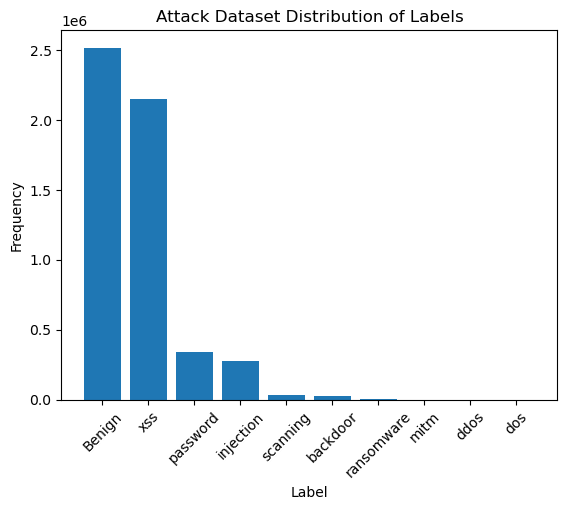

In [33]:
#The class distribution in the first dataset

# Define the desired label arrangement
desired_labels = ['Benign', 'xss', 'password', 'injection', 'scanning', "backdoor", "ransomware", "mitm", "ddos", "dos"]

# Count the frequency of each label
label_counts = first_dataset['Attack'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
# colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Attack Dataset Distribution of Labels')
plt.xticks(rotation = 45)

# Show the plot
plt.show()


Cat
Mirai                281243
DoS                   59390
Scan                  56744
Normal                38598
MITM ARP Spoofing     25862
Name: count, dtype: int64


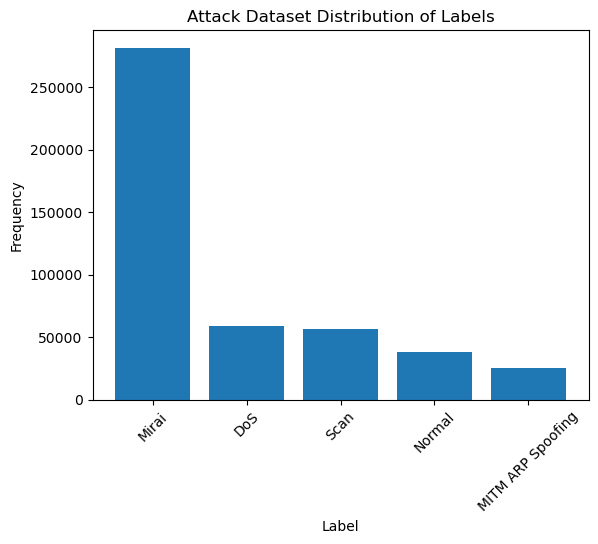

In [34]:
cleaned_second_dataset["Cat"].value_counts()
#The class distribution in the first dataset

# Define the desired label arrangement
desired_labels = ['Mirai', 'DoS', 'Scan', 'Normal', 'MITM ARP Spoofing']

# Count the frequency of each label
label_counts = cleaned_second_dataset['Cat'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
# colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Attack Dataset Distribution of Labels')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

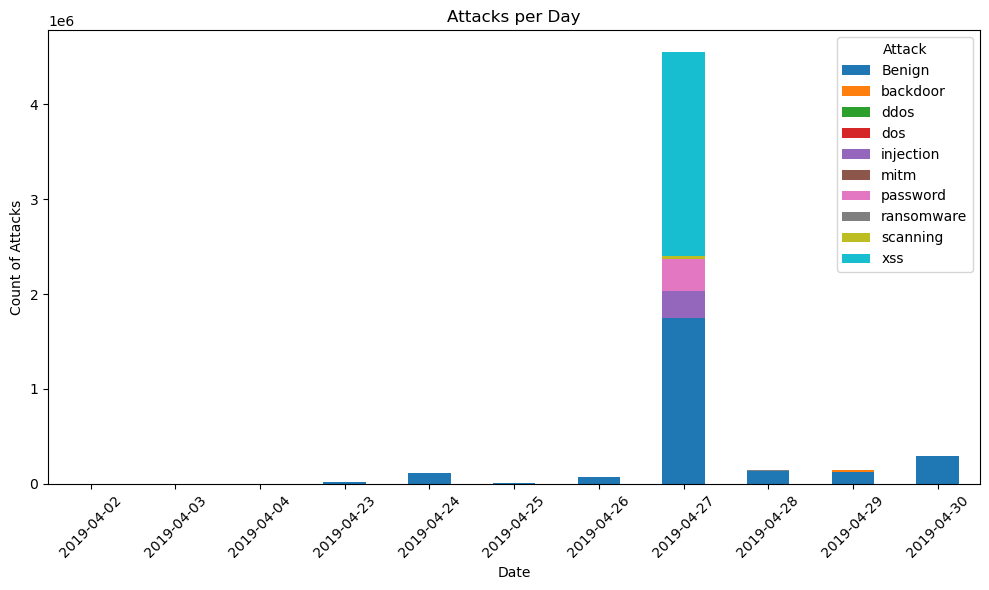

In [35]:
# Plot events per day 
# Seperate attack and date from 

# Convert the "Timestamp" column to datetime format
first_dataset_date_attack = pd.DataFrame(first_dataset, columns=["Timestamp", "Attack"])
first_dataset_date_attack['Timestamp'] = pd.to_datetime(first_dataset_date_attack['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

# Extract the date by date from the datetime object
first_dataset_date_attack['Timestamp'] = first_dataset_date_attack['Timestamp'].dt.date

# Group the data by Timestamp, and count the occurrences of each Cat/Attack
first_dataset_events_per_day = first_dataset_date_attack.groupby(['Timestamp', 'Attack']).size().unstack(fill_value=0)

# Plot the multiple bar chart
first_dataset_events_per_day.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count of Attacks')
plt.title('Attacks per Day')
plt.legend(title='Attack')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [36]:
# Validating content in the chart by sorting 
sorted_date_attack = first_dataset_date_attack.value_counts().sort_index()
sorted_date_attack

Timestamp   Attack    
2019-04-02  Benign            280
2019-04-03  Benign            813
2019-04-04  Benign            601
2019-04-23  Benign          20485
2019-04-24  Benign         114480
2019-04-25  Benign          12540
2019-04-26  Benign          76019
2019-04-27  Benign        1749122
            injection      277689
            password       340206
            scanning        36176
            xss           2149308
2019-04-28  Benign         130127
            backdoor         5006
            ransomware       5098
2019-04-29  Benign         118417
            backdoor        22139
            ddos              202
            dos               145
            injection           7
            mitm              489
            password            2
            scanning           29
2019-04-30  Benign         292352
            mitm               28
Name: count, dtype: int64

In [37]:
# Validating content in the chart showing each attacks per day and representing those not recoreded has zero
first_dataset_events_per_day

Attack,Benign,backdoor,ddos,dos,injection,mitm,password,ransomware,scanning,xss
Timestamp,,,,,,,,,,
2019-04-02,280,0,0,0,0,0,0,0,0,0
2019-04-03,813,0,0,0,0,0,0,0,0,0
2019-04-04,601,0,0,0,0,0,0,0,0,0
2019-04-23,20485,0,0,0,0,0,0,0,0,0
2019-04-24,114480,0,0,0,0,0,0,0,0,0
2019-04-25,12540,0,0,0,0,0,0,0,0,0
2019-04-26,76019,0,0,0,0,0,0,0,0,0
2019-04-27,1749122,0,0,0,277689,0,340206,0,36176,2149308
2019-04-28,130127,5006,0,0,0,0,0,5098,0,0


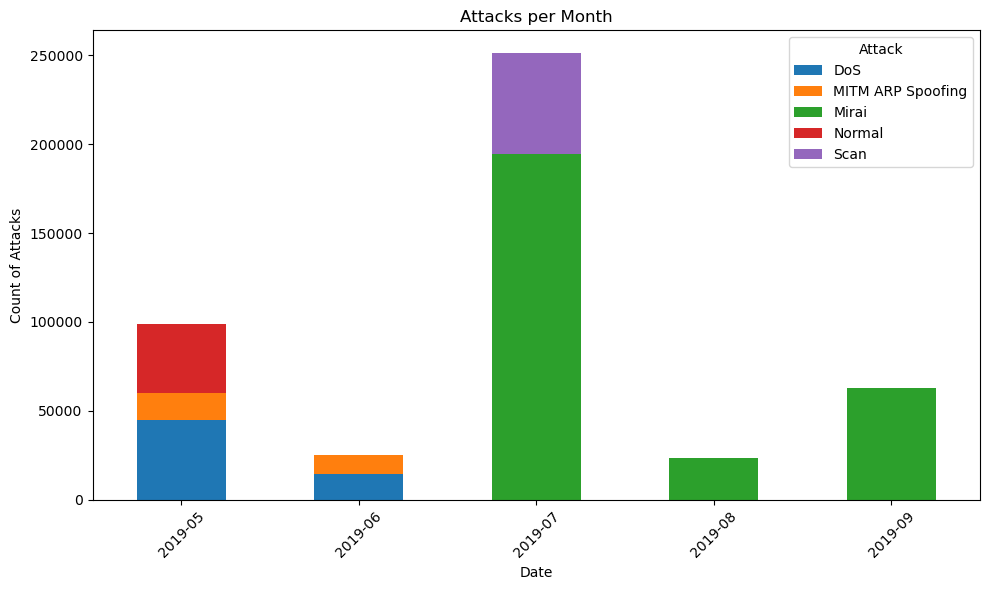

In [38]:
# Plot events per Month 
# Seperate attack and date from 

# Convert the "Timestamp" column to datetime format
cleaned_second_dataset_date_attack = pd.DataFrame(cleaned_second_dataset, columns=["Timestamp", "Cat"])
cleaned_second_dataset_date_attack['Timestamp'] = pd.to_datetime(cleaned_second_dataset_date_attack['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

# Extract the date by month from the datetime object
cleaned_second_dataset_date_attack['Timestamp'] = cleaned_second_dataset_date_attack['Timestamp'].dt.to_period('M')

# Group the data by Timestamp, and count the occurrences of each Cat/Attack
events_per_month = cleaned_second_dataset_date_attack.groupby(['Timestamp', 'Cat']).size().unstack(fill_value=0)

# Plot the multiple bar chart
events_per_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count of Attacks')
plt.title('Attacks per Month')
plt.legend(title='Attack')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [39]:
# Validating content in the chart by sorting 
sorted_date_cat = cleaned_second_dataset_date_attack.value_counts().sort_index()
sorted_date_cat

Timestamp  Cat              
2019-05    DoS                   44666
           MITM ARP Spoofing     15385
           Normal                38598
2019-06    DoS                   14724
           MITM ARP Spoofing     10477
2019-07    Mirai                194736
           Scan                  56744
2019-08    Mirai                 23404
2019-09    Mirai                 63103
Name: count, dtype: int64

In [40]:
# Validating content in the chart showing each attacks per day and representing those not recoreded has zero
events_per_month

Cat,DoS,MITM ARP Spoofing,Mirai,Normal,Scan
Timestamp,,,,,
2019-05,44666,15385,0,38598,0
2019-06,14724,10477,0,0,0
2019-07,0,0,194736,0,56744
2019-08,0,0,23404,0,0
2019-09,0,0,63103,0,0


### Combining the two dataset

In [41]:
'''
#### Note
It has been identified that the datasets have some similar columns and some that are not.
    # Actions to be performed on the first dataset:
        1. Each column will be renamed to match its respective self in the second dataset which includes replacing the space in the names of the columns with "_"
        2. Drop the label column 
        3. Convert the attacks to lowercase and rename benign to normal
        4. convert DDoS attacks to DoS attack
    # Actions to be performed on the second dataset:
        1. The label and the sub-cat columns will be dropped 
        2. The Cat column will be renamed to attack
        3. The attacks will be changed to small letters and some will be renamed to match those in the first dataset e.g. MITM ARP Spoofing to mitm, scan to scanning
'''

'\n#### Note\nIt has been identified that the datasets have some similar columns and some that are not.\n    # Actions to be performed on the first dataset:\n        1. Each column will be renamed to match its respective self in the second dataset which includes replacing the space in the names of the columns with "_"\n        2. Drop the label column \n        3. Convert the attacks to lowercase and rename benign to normal\n        4. convert DDoS attacks to DoS attack\n    # Actions to be performed on the second dataset:\n        1. The label and the sub-cat columns will be dropped \n        2. The Cat column will be renamed to attack\n        3. The attacks will be changed to small letters and some will be renamed to match those in the first dataset e.g. MITM ARP Spoofing to mitm, scan to scanning\n'

#### Cleaning the first dataset 

In [42]:
# First drop the "label" column and renaming the columns removing the space and replacing it with "_"
#Dropping the "label" column
cleaned_first_dataset = first_dataset.drop('Label', axis=1)
#Renaming the columns
cleaned_first_dataset.columns = cleaned_first_dataset.columns.str.replace(' ', '_') 

In [43]:
# Displaying the first five rows to verify changes 
cleaned_first_dataset.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,Benign
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,Benign
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,Benign
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,Benign
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,Benign


In [44]:
# Rename Benign and ddos in Attack column to normal and dos and change all attacks to lowercase 
cleaned_first_dataset["Attack"] = cleaned_first_dataset["Attack"].str.replace("ddos", "dos")
cleaned_first_dataset["Attack"] = cleaned_first_dataset["Attack"].str.replace("Benign", "normal")
cleaned_first_dataset["Attack"] = cleaned_first_dataset["Attack"].str.lower()

In [45]:
# Displaying the first five rows to verify changes 
cleaned_first_dataset.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,normal
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,normal
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,normal
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,normal
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,normal


In [46]:
# Displaying the first five rows to verify changes 
cleaned_first_dataset.tail(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
5351755,96.49.192.168-1.30.18.184-0-0-0,96.49.192.168,0,1.30.18.184,0,0,25/04/2019 04:34:34 pm,43774681,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045689,43774681.0,0.0,43774681.0,43774681.0,43774681.0,43774681.0,0.0,43774681.0,43774681.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.045689,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7.780871e+14,1.100381e+15,1.556174e+15,43774681.0,normal
5351756,57.157.192.168-1.30.192.168-0-0-0,57.157.192.168,0,1.30.192.168,0,0,25/04/2019 04:30:56 pm,29833504,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067039,29833504.0,0.0,29833504.0,29833504.0,29833504.0,29833504.0,0.0,29833504.0,29833504.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.067039,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7.780869e+14,1.100381e+15,1.556174e+15,29833504.0,normal
5351757,183.43.192.168-1.1.192.168-0-0-0,183.43.192.168,0,1.1.192.168,0,0,25/04/2019 04:48:39 pm,28680917,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069733,28680917.0,0.0,28680917.0,28680917.0,28680917.0,28680917.0,0.0,28680917.0,28680917.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.069733,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7.780875e+14,1.100382e+15,1.556175e+15,28680917.0,normal
5351758,193.129.192.168-1.195.192.168-0-0-0,193.129.192.168,0,1.195.192.168,0,0,25/04/2019 05:01:42 pm,7210916,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277357,7210916.0,0.0,7210916.0,7210916.0,7210916.0,7210916.0,0.0,7210916.0,7210916.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.277357,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7.780879e+14,1.100382e+15,1.556176e+15,7210916.0,normal
5351759,153.12.192.168-1.152.192.168-0-0-0,153.12.192.168,0,1.152.192.168,0,0,25/04/2019 04:09:55 pm,6661462,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300234,6661462.0,0.0,6661462.0,6661462.0,6661462.0,6661462.0,0.0,6661462.0,6661462.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.300234,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7.780863e+14,1.100380e+15,1.556173e+15,6661462.0,normal


In [47]:
cleaned_first_dataset.shape

(5351760, 84)

##### Cleaning the second_dataset

In [48]:
# First drop the "label" and "sub-cat" columns and renaming the "Cat" column to "Attack" column
#Dropping the "label" and "sub-cat" columns
new_cleaned_second_dataset = cleaned_second_dataset.drop(['Label', 'Sub_Cat'], axis=1)
new_cleaned_second_dataset = new_cleaned_second_dataset.rename(columns={'Cat':'Attack'})

In [49]:
# Displaying the first five rows to verify changes 
new_cleaned_second_dataset.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai


In [50]:
# Rename MITM ARP Spoofing in Attack column to mitm and change all attacks to lowercase 
new_cleaned_second_dataset["Attack"] = new_cleaned_second_dataset["Attack"].str.replace("MITM ARP Spoofing", "mitm")
new_cleaned_second_dataset["Attack"] = new_cleaned_second_dataset["Attack"].str.replace("Scan", "scanning")
new_cleaned_second_dataset["Attack"] = new_cleaned_second_dataset["Attack"].str.lower()

In [51]:
# Displaying the first five rows to verify changes 
new_cleaned_second_dataset.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,mirai
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,dos
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,scanning
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,mirai
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,mirai


In [52]:
# Displaying the first five rows to verify changes 
new_cleaned_second_dataset.tail(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
625773,192.168.0.24-210.89.164.90-60165-8899-17,192.168.0.24,60165,210.89.164.90,8899,17,25/07/2019 03:21:00 AM,29,5,1,160.0,32.0,32.0,32.0,32.0,0.0,32.0,32.0,32.0,0.0,6.620690e+06,206896.551724,5.8,3.346640,11.0,3.0,22.0,5.5,3.785939,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,8,172413.793103,34482.758621,32.0,32.0,32.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,37.333333,32.0,32.0,0,0,0,0,0,0,5,160,1,32,-1,-1,5,0,0.0,0.0,0.0,0.0,5.8,3.346640,11.0,3.0,mirai
625776,192.168.0.24-111.57.139.118-19604-8739-6,111.57.139.118,8739,192.168.0.24,19604,6,04/06/2019 11:44:26 PM,1092,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1831.501832,1092.0,0.000000,1092.0,1092.0,0.0,0.0,0.000000,0.0,0.0,1092.0,1092.0,0.0,1092.0,1092.0,0,0,0,0,0,40,0.000000,1831.501832,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,0,2,0,-1,0,0,0,0.0,0.0,0.0,0.0,1092.0,0.000000,1092.0,1092.0,dos
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,18.0,18.0,18.0,18.0,18.0,0.0,18.0,18.0,18.0,0.0,1.299639e+05,7220.216606,277.0,0.000000,277.0,277.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,3610.108303,3610.108303,18.0,18.0,18.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,27.000000,18.0,18.0,0,0,0,0,0,0,1,18,1,18,-1,-1,1,0,0.0,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,mirai
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1206.272618,1658.0,0.000000,1658.0,1658.0,0.0,0.0,0.000000,0.0,0.0,1658.0,1658.0,0.0,1658.0,1658.0,0,0,0,0,0,44,0.000000,1206.272618,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,dos
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,0.0,1388.0,1388.0,1388.0,0.0,1.735000e+07,12500.000000,120.0,7.071068,125.0,115.0,125.0,125.0,0.000000,125.0,125.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,64,32,8333.333333,4166.666667,1388.0,1388.0,1388.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,1850.666667,1388.0,1388.0,0,0,0,0,0,0,2,2776,1,1388,-1,1869,2,0,0.0,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,normal


In [53]:
#Comparing the two datasets columns after data cleaning
print("First dataset now with columns number - ", len(cleaned_first_dataset.columns))
print(cleaned_first_dataset.columns)
print("\n")
print("Second dataset now with columns number - ", len(new_cleaned_second_dataset.columns))
print(new_cleaned_second_dataset.columns)


First dataset now with columns number -  84
Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'U

In [54]:
# Check if the all the columns of the dataset match
if (cleaned_first_dataset.columns.all() == new_cleaned_second_dataset.columns.all()):
    print("The columns of both datasets are the same!")
else:
    print("The columns of both datasets are not the same!")

The columns of both datasets are the same!


## Combining the two datasets now

In [55]:
# Combine the two datasets together 
merged_dataset = pd.concat([cleaned_first_dataset, new_cleaned_second_dataset])

In [56]:
# Display the first 10 rows
merged_dataset.head(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,177.30.87.144-192.168.1.1-0-0-0,177.30.87.144,0,192.168.1.1,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,normal
1,167.49.176.28-50.165.192.168-0-0-0,167.49.176.28,0,50.165.192.168,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,normal
2,230.158.52.59-177.21.192.168-0-0-0,230.158.52.59,0,177.21.192.168,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,normal
3,183.68.192.168-1.1.192.168-0-0-0,183.68.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,normal
4,183.41.192.168-1.1.192.168-0-0-0,183.41.192.168,0,1.1.192.168,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,normal
5,230.161.52.59-177.21.192.168-0-0-0,230.161.52.59,0,177.21.192.168,0,0,25/04/2019 05:19:00 pm,28816963,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138807,9.605654e+06,9.179819e+06,18345044.0,41118.0,28816963.0,9.605654e+06,9.179819e+06,18345044.0,41118.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.138807,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,41118.0,0.000000e+00,41118.0,41118.0,5.187256e+14,8.984591e+14,1.556177e+15,1.043080e+07,normal
6,244.15.103.11

In [57]:
# Display the last 10 rows
merged_dataset.tail(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
625767,192.168.0.24-210.89.164.90-51993-8899-17,192.168.0.24,51993,210.89.164.90,8899,17,25/07/2019 03:20:13 AM,16,2,1,64.0,32.0,32.0,32.0,32.0,0.0,32.0,32.0,32.0,0.0,6.000000e+06,187500.000000,8.000000,2.828427,10.0,6.0,10.0,10.0,0.000000,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,8,125000.000000,62500.000000,32.0,32.0,32.0,0.000000,0.0,0,0,0,0,0,0,0,0,0.0,42.666667,32.0,32.0,0,0,0,0,0,0,2,64,1,32,-1,-1,2,0,0.000000,0.00000,0.0,0.0,8.00,2.828427,10.0,6.0,mirai
625768,192.168.0.24-111.190.23.58-19604-1075-6,111.190.23.58,1075,192.168.0.24,19604,6,04/06/2019 11:47:42 PM,1368,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1461.988304,1368.000000,0.000000,1368.0,1368.0,0.0,0.0,0.000000,0.0,0.0,1368.0,1368.0,0.0,1368.0,1368.0,0,0,0,0,0,40,0.000000,1461.988304,0.0,0.0,0.0,0.000000,0.0,0,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,0,2,0,-1,0,0,0,0.000000,0.00000,0.0,0.0,1368.00,0.000000,1368.0,1368.0,dos
625769,192.168.0.13-210.89.164.90-60215-8899-17,192.168.0.13,60215,210.89.164.90,8899,17,25/07/2019 03:21:30 AM,236,11,1,352.0,32.0,32.0,32.0,32.0,0.0,32.0,32.0,32.0,0.0,1.627119e+06,50847.457627,21.454545,67.512019,225.0,0.0,235.0,23.5,70.803719,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,88,8,46610.169492,4237.288136,32.0,32.0,32.0,0.000000,0.0,0,0,0,0,0,0,0,0,0.0,34.666667,32.0,32.0,0,0,0,0,0,0,11,352,1,32,-1,-1,11,0,1.666667,0.57735,2.0,1.0,57.75,111.500000,225.0,2.0,mirai
625770,192.168.0.13-192.168.0.16-9020-52704-6,192.168.0.16,52704,192.168.0.13,9020,6,11/07/2019 01:12:46 AM,76,0,2,0.0,2776.0,0.0,0.0,0.0,0.0,1388.0,1388.0,1388.0,0.0,3.652632e+07,26315.789474,76.000000,0.000000,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,76.0,76.0,0.0,76.0,76.0,0,0,0,0,0,64,0.000000,26315.789474,1388.0,1388.0,1388.0,0.000000,0.0,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.0,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.000000,0.00000,0.0,0.0,76.00,0.000000,76.0,76.0,scanning
625772,192.168.0.13-192.168.0.24-5664-23-6,192.168.0.13,5664,192.168.0.24,23,6,10/09/2019 01:39:46 AM,28,1,1,0.0,69.0,0.0,0.0,0.0,0.0,69.0,69.0,69.0,0.0,2.464286e+06,71428.571429,28.000000,0.000000,28.0,28.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,20,20,35714.285714,35714.285714,0.0,69.0,46.0,39.837169,1587.0,1,0,0,1,1,0,0,0,1.0,69.000000,0.0,69.0,0,0,0,0,0,0,1,0,1,69,-1,256,0,0,0.000000,0.00000,0.0,0.0,28.00,0.000000,28.0,28.0,mirai
625773,192.168.0.24-210.89.164.90-60165-8899-17,192.168.0.24,60165,210.89.164.90,8899,17,25/07/2019 03:21:00 AM,29,5,1,160.0,32.0,32.0,32.0,32.0,0.0,32.0,32.0,32.0,0.0,6.620690e+06,206896.551724,5.800000,3.346640,11.0,3.0,22.0,5.5,3.785939,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,8,172413.793103,34482.758621,32.0,32.0,32.0,0.000000,0.0,0,0,0,0,0,0,0,0,0.0,37.333333,32.0,32.0,0,0,0,0,0,0,5,160,1,32,-1,-1,5,0,0.000000,0.00000,0.0,0.0,5.80,3.346640,11.0,3.0,mirai
625776,192.168.0.24-111.57.139.118-19604-8739-6,111.57.139.118,8739,192.168.0.24,19604,6

In [58]:
# Check dataset shape
merged_dataset.shape

(5813597, 84)

Attack
normal        2553834
xss           2149308
password       340208
mirai          281243
injection      277696
dos             59737
scanning        92949
backdoor        27145
mitm            26379
ransomware       5098
Name: count, dtype: int64


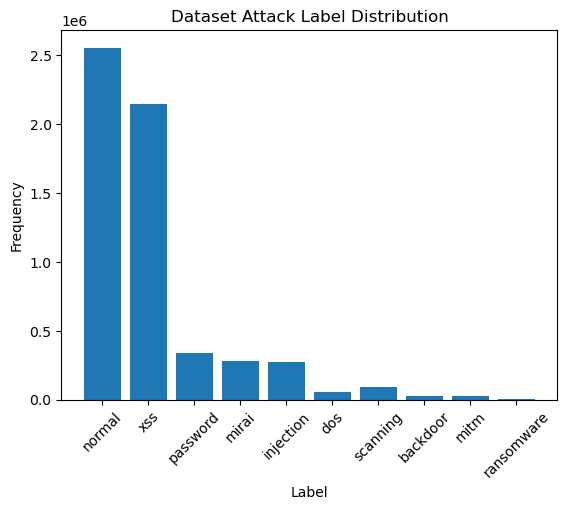

In [59]:
#The class distribution in the merged dataset

# Define the desired label arrangement
desired_labels = ['normal', 'xss', 'password', 'mirai', 'injection', "dos", 'scanning', "backdoor", "mitm", "ransomware"]

# Count the frequency of each label
label_counts = merged_dataset['Attack'].value_counts()
print(label_counts.reindex(desired_labels))

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Dataset Attack Label Distribution')
plt.xticks(rotation = 45)

# Show the plot
plt.show()


## Feature Selection

#### More data cleaning and preprocessing before feature selection 
To enable the use of columns with texts and objects, some columns will be converted like the Timestamp column to its integer value in seconds, some columns also only contain zero so they will be dropped and the others which contain objects also will be encoded using label encoder which converts individual values in each column to a number starting from 0
The following columns will be encoded - 
1. Attack column (Each attack will be encoded with a number representing each attack)
2. Flow_ID (The flow_ID served as a unique identifier for each column it will be dropped)
3. Src_IP (IP Address)
4. Dst_IP (IP Address)
5. TimeStamp (Dates are stored in form of objects)
6. 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'URG_Flag_Cnt', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',
       'Subflow_Bwd_Pkts', 'Flow_ID' (Contains only 0 so it would be dropped)       

#### 
 

In [60]:
#Perform Label encoding to change the values of the Attacks to digits
encoded_merged_dataset = pd.DataFrame(merged_dataset)
#Encode the labels 
Attack_encoder = LabelEncoder()
Src_IP_encoder = LabelEncoder()
Dst_IP_encoder = LabelEncoder()

encoded_merged_dataset['Attack'] = Attack_encoder.fit_transform(encoded_merged_dataset['Attack'])
encoded_merged_dataset['Src_IP'] = Src_IP_encoder.fit_transform(encoded_merged_dataset['Src_IP'])
encoded_merged_dataset['Dst_IP'] = Dst_IP_encoder.fit_transform(encoded_merged_dataset['Dst_IP'])

# Dropping the Flow_ID columns and the columns that contain zero throughout
encoded_merged_dataset = encoded_merged_dataset.drop(['Fwd_URG_Flags', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'URG_Flag_Cnt',
       'Fwd_Byts/b_Avg', 'Subflow_Bwd_Pkts', 'Flow_ID'], axis=1)

In [61]:
# Show the labels and their corresponding encoding for Attack column
dict(zip(Attack_encoder.classes_,range(len(Attack_encoder.classes_))))

{'backdoor': 0,
 'dos': 1,
 'injection': 2,
 'mirai': 3,
 'mitm': 4,
 'normal': 5,
 'password': 6,
 'ransomware': 7,
 'scanning': 8,
 'xss': 9}

In [62]:
# Show the labels and their corresponding encoding for Src_IP column
dict(zip(Src_IP_encoder.classes_,range(len(Src_IP_encoder.classes_))))

{'0.0.0.0': 0,
 '0.0.184.85': 1,
 '0.0.192.168': 2,
 '0.0.216.58': 3,
 '0.1.10.246': 4,
 '0.1.192.168': 5,
 '0.10.10.246': 6,
 '0.10.192.168': 7,
 '0.100.192.168': 8,
 '0.100.216.58': 9,
 '0.101.10.246': 10,
 '0.101.192.168': 11,
 '0.102.10.246': 12,
 '0.102.192.168': 13,
 '0.102.216.58': 14,
 '0.103.10.246': 15,
 '0.103.192.168': 16,
 '0.103.216.58': 17,
 '0.104.10.246': 18,
 '0.104.192.168': 19,
 '0.105.192.168': 20,
 '0.106.10.246': 21,
 '0.106.192.168': 22,
 '0.107.192.168': 23,
 '0.107.216.58': 24,
 '0.108.192.168': 25,
 '0.109.192.168': 26,
 '0.11.10.246': 27,
 '0.11.172.17': 28,
 '0.11.192.168': 29,
 '0.110.192.168': 30,
 '0.111.192.168': 31,
 '0.112.192.168': 32,
 '0.112.74.125': 33,
 '0.113.10.246': 34,
 '0.113.192.168': 35,
 '0.114.10.246': 36,
 '0.114.192.168': 37,
 '0.114.74.125': 38,
 '0.115.192.168': 39,
 '0.116.10.246': 40,
 '0.116.192.168': 41,
 '0.117.10.246': 42,
 '0.117.192.168': 43,
 '0.118.10.246': 44,
 '0.118.192.168': 45,
 '0.119.192.168': 46,
 '0.119.216.58': 47

In [63]:
# Show the labels and their corresponding encoding for Dst_IP column
dict(zip(Dst_IP_encoder.classes_,range(len(Dst_IP_encoder.classes_))))

{'0.0.0.0': 0,
 '0.0.0.16': 1,
 '0.0.0.36': 2,
 '0.1.192.168': 3,
 '0.11.192.168': 4,
 '0.3.192.168': 5,
 '0.40.0.0': 6,
 '0.40.0.1': 7,
 '0.40.121.31': 8,
 '0.5.192.168': 9,
 '0.7.192.168': 10,
 '0.8.192.168': 11,
 '1.1.192.168': 12,
 '1.1.239.255': 13,
 '1.133.192.168': 14,
 '1.152.114.216': 15,
 '1.152.124.10': 16,
 '1.152.126.3': 17,
 '1.152.13.35': 18,
 '1.152.151.101': 19,
 '1.152.170.5': 20,
 '1.152.173.234': 21,
 '1.152.18.2': 22,
 '1.152.189.77': 23,
 '1.152.192.168': 24,
 '1.152.195.245': 25,
 '1.152.2.240': 26,
 '1.152.20.114': 27,
 '1.152.210.57': 28,
 '1.152.212.207': 29,
 '1.152.224.0': 30,
 '1.152.23.36': 31,
 '1.152.248.96': 32,
 '1.152.255.255': 33,
 '1.152.27.174': 34,
 '1.152.3.122': 35,
 '1.152.39.49': 36,
 '1.152.5.174': 37,
 '1.152.61.1': 38,
 '1.152.7.133': 39,
 '1.152.90.1': 40,
 '1.169.172.217': 41,
 '1.169.192.168': 42,
 '1.169.216.58': 43,
 '1.169.40.90': 44,
 '1.169.52.255': 45,
 '1.169.74.125': 46,
 '1.180.172.17': 47,
 '1.180.173.194': 48,
 '1.180.192.168'

In [64]:
encoded_merged_dataset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,76462,0,893,0,0,25/04/2019 05:18:52 pm,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,5
1,70238,0,1900,0,0,25/04/2019 05:18:49 pm,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,5
2,140236,0,790,0,0,25/04/2019 05:18:37 pm,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,5
3,80449,0,12,0,0,25/04/2019 05:18:42 pm,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,5
4,80387,0,12,0,0,25/04/2019 05:18:42 pm,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,5


In [65]:
# Extract the TimeStamp columns for conversion
datetime_strings = encoded_merged_dataset['Timestamp']

# Convert Timestamps to datetime objects
datetime_objects = pd.to_datetime(datetime_strings, format='%d/%m/%Y %I:%M:%S %p')

datetime_objects.head()

0   2019-04-25 17:18:52
1   2019-04-25 17:18:49
2   2019-04-25 17:18:37
3   2019-04-25 17:18:42
4   2019-04-25 17:18:42
Name: Timestamp, dtype: datetime64[ns]

In [66]:
# Convert datetime objects to seconds
datetime_seconds = datetime_objects.astype(int) // 10**9
datetime_seconds.head()

0    1556212732
1    1556212729
2    1556212717
3    1556212722
4    1556212722
Name: Timestamp, dtype: int64

In [67]:
# Change the values in the Timestamp column to its integer value 
encoded_merged_dataset['Timestamp'] = datetime_seconds
encoded_merged_dataset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,76462,0,893,0,0,1556212732,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07,5
1,70238,0,1900,0,0,1556212729,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,5
2,140236,0,790,0,0,1556212717,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06,5
3,80449,0,12,0,0,1556212722,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15,5
4,80387,0,12,0,0,1556212722,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06,5


#### Check for correlation among the data to the target value

In [68]:
# First we check the correlation of each column with the attack column
corr_data = encoded_merged_dataset.corr()
corr_data.abs()['Attack'].sort_values(ascending=False)

Attack               1.000000
Src_Port             0.454885
Dst_Port             0.421164
Idle_Mean            0.367488
Idle_Max             0.341118
Idle_Min             0.337217
Timestamp            0.315544
Protocol             0.238093
Fwd_Pkt_Len_Std      0.215566
Init_Fwd_Win_Byts    0.207456
Fwd_Pkt_Len_Max      0.177912
Pkt_Len_Std          0.170005
Bwd_Pkt_Len_Std      0.165583
Fwd_Seg_Size_Min     0.160831
Subflow_Fwd_Pkts     0.157658
Bwd_Pkt_Len_Min      0.144498
Pkt_Len_Max          0.139098
Pkt_Len_Min          0.134704
Pkt_Len_Var          0.128068
Fwd_Pkt_Len_Min      0.126381
Flow_Pkts/s          0.117363
Idle_Std             0.110979
Flow_Byts/s          0.110726
Fwd_Pkts/s           0.105308
Bwd_Pkt_Len_Max      0.091997
Bwd_Pkts/s           0.089587
Init_Bwd_Win_Byts    0.083899
Fwd_PSH_Flags        0.081472
FIN_Flag_Cnt         0.074551
Subflow_Bwd_Byts     0.074034
Dst_IP               0.072297
Fwd_Seg_Size_Avg     0.058300
Fwd_Pkt_Len_Mean     0.058300
Pkt_Size_A

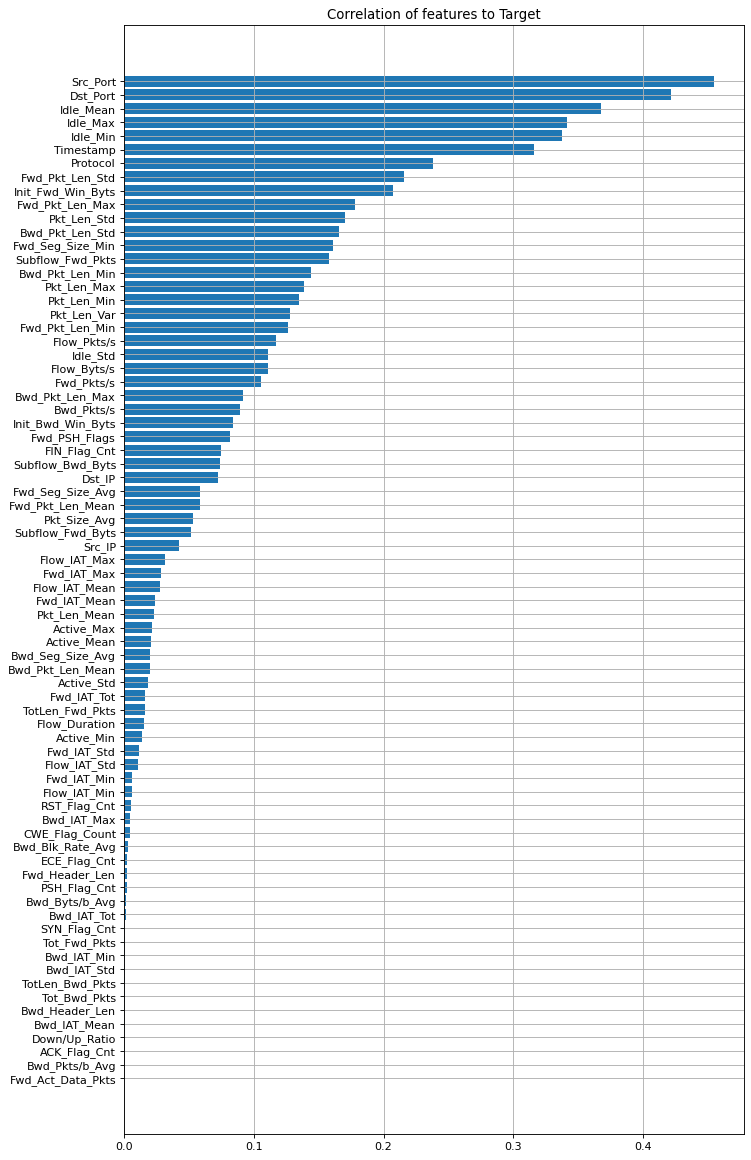

In [69]:
def plot_corr_scores(corr_data, target):
    """
    Displays the horizontal bar plot showing how features are correlated with the target variable
    corr_data: The DataFrame containing the correlation scores between all the features
    target: The dependent variable whoes value you aim to predict
    """
    scores = corr_data.abs()[target].drop(target)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Correlation of features to Target")
    plt.grid()
    
plt.figure(dpi=80, figsize=(10,18))
plot_corr_scores(corr_data, "Attack")


##### Before Feature Selection Test the dataset with some other models

#### Split the dataset

In [68]:
# Separating the dataset in preparation for feature selection 
X = encoded_merged_dataset.drop(columns=["Attack"])
Y = encoded_merged_dataset["Attack"]

In [69]:
#Get the training and test set from the depression dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 24)

In [70]:
#Check the shape to get the number of rows and columns in the training data
x_train.shape

(4069517, 74)

In [71]:
#Check the shape to get the number of rows and columns in the training label data
y_train.shape

(4069517,)

In [72]:
#Check the shape to get the number of rows and columns in the test data
x_test.shape

(1744080, 74)

In [73]:
#Check the shape to get the number of rows and columns in the test label data
y_test.shape

(1744080,)

In [74]:
# Count the frequency of all labels
label_counts = Y.value_counts()
print(label_counts.reindex())

Attack
5    2553834
9    2149308
6     340208
3     281243
2     277696
8      92949
1      59737
0      27145
4      26379
7       5098
Name: count, dtype: int64


In [75]:
# Count the frequency of each label in the training data
label_counts = y_train.value_counts()
print(label_counts.reindex())

Attack
5    1787906
9    1503702
6     238212
3     197170
2     194399
8      65168
1      41905
0      18996
4      18504
7       3555
Name: count, dtype: int64


In [76]:
# Count the frequency of each label in the test data
label_counts = y_test.value_counts()
print(label_counts.reindex())

Attack
5    765928
9    645606
6    101996
3     84073
2     83297
8     27781
1     17832
0      8149
4      7875
7      1543
Name: count, dtype: int64


### Training some models and get their performance on the dataset 

#### DecisionTreeClassifier

In [76]:
# DecisionTreeClassifier Model Training
dt_model = DecisionTreeClassifier(random_state=30, max_depth=10)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=30)

In [77]:
#Get Models Prediction
y_pred = dt_model.predict(x_test)

In [78]:
y_pred

array([9, 6, 5, ..., 5, 9, 3])

In [79]:
def generateConfusionMatrix(y_pred, y_test):
    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    import seaborn as sns

    #Setting the labels
    labels = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)']

    #Plot the Confusion matrix graph
    fig= plt.figure(figsize=(8, 5))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')
    ax.set_xlabel('Predicted Labels', fontsize=10)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(labels, fontsize = 5)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True Labels', fontsize=10)
    ax.yaxis.set_ticklabels(labels, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title('Confusion Matrix', fontsize=15)

    # plt.savefig(name_of_model, '.png')
    plt.show()

[[  8098      0      0      0      0     38      0     13      0      0]
 [     0  17821      0      0     11      0      0      0      0      0]
 [     0      2   7378      0      0     15  25845      0      0  50057]
 [     0      0      0  84072      0      0      0      0      1      0]
 [     0     61      0      0   7777      6     17      0      0     14]
 [     1      0    116      0      0 759032    178      4      0   6597]
 [     0      1      0      0      0      0  62085      0      0  39910]
 [     6      0      0      0      0     45      0   1425      0     67]
 [     0      7      0      0      0      1   4169      0  17144   6460]
 [     0      1   4831      0      0   2851  60109      0      0 577814]]


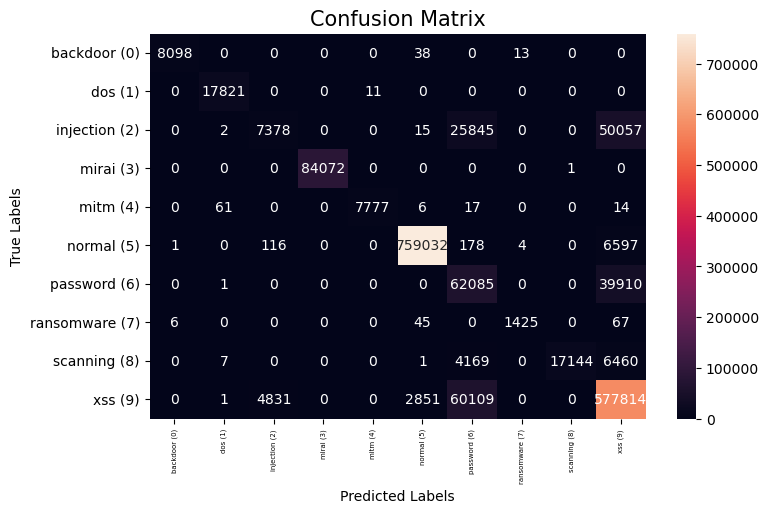

In [80]:
# Decision Tree Confusion Matrix
generateConfusionMatrix(y_pred, y_test)

In [81]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)']))

                precision    recall  f1-score   support

  backdoor (0)       1.00      0.99      1.00      8149
       dos (1)       1.00      1.00      1.00     17832
 injection (2)       0.60      0.09      0.15     83297
     mirai (3)       1.00      1.00      1.00     84073
      mitm (4)       1.00      0.99      0.99      7875
    normal (5)       1.00      0.99      0.99    765928
  password (6)       0.41      0.61      0.49    101996
ransomware (7)       0.99      0.92      0.95      1543
  scanning (8)       1.00      0.62      0.76     27781
       xss (9)       0.85      0.89      0.87    645606

      accuracy                           0.88   1744080
     macro avg       0.88      0.81      0.82   1744080
  weighted avg       0.89      0.88      0.88   1744080



In [82]:
def ModelPerformanceGenerator(y_test, y_pred):
    # Evaluate the model using accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print the evaluation metrics
    print("Accuracy: %.2f" %(accuracy*100))
    print("Precision: %.2f" %(precision*100))
    print("Recall: %.2f" %(recall*100))
    print("F1-score: %.2f" %(f1*100))

In [83]:
# Show models performance
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 88.45
Precision: 88.33
Recall: 81.05
F1-score: 82.12


#### RandomForestClassifier

In [79]:
# RandomForestClassifier Model Training
rf_model = RandomForestClassifier(random_state=30)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=30)

In [80]:
#Get Models Prediction
y_pred = rf_model.predict(x_test)

[[  8135      0      0      0      0      4      0     10      0      0]
 [     0  17776      2      0     47      2      0      0      5      0]
 [     0      1   6856      0      1     85  15948      0      0  60406]
 [     0      0      0  84073      0      0      0      0      0      0]
 [     0     59      1      0   7804      7      0      0      4      0]
 [     0      0    166      0     27 759129    177     16      7   6406]
 [     0      0  14067      0      1     69   9759      0   2860  75240]
 [    13      0      0      0      0     34      0   1496      0      0]
 [     0      6      0      2      6      3   3288      0  17304   7172]
 [     0      0  51321      0      0   2716  69650      0   5559 516360]]


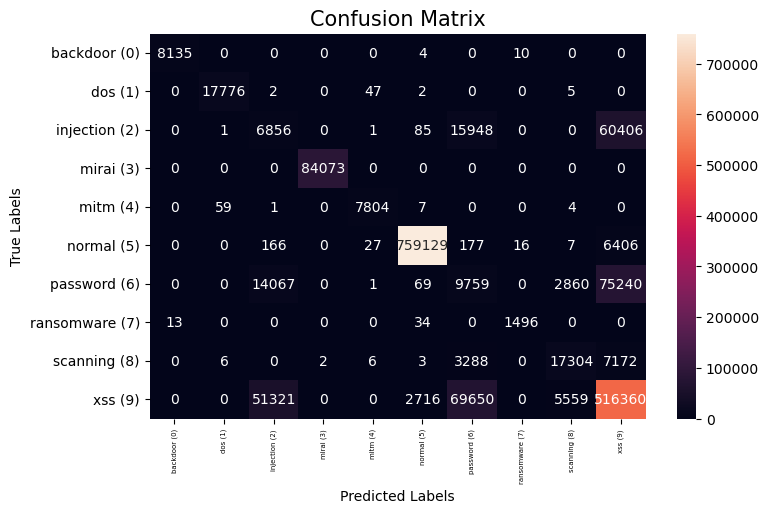

In [84]:
generateConfusionMatrix(y_pred, y_test)

In [ ]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)']))

                precision    recall  f1-score   support

  backdoor (0)       1.00      1.00      1.00      8149
       dos (1)       1.00      1.00      1.00     17832
 injection (2)       0.09      0.08      0.09     83297
     mirai (3)       1.00      1.00      1.00     84073
      mitm (4)       0.99      0.99      0.99      7875
    normal (5)       1.00      0.99      0.99    765928
  password (6)       0.10      0.10      0.10    101996
ransomware (7)       0.98      0.97      0.98      1543
  scanning (8)       0.67      0.62      0.65     27781
       xss (9)       0.78      0.80      0.79    645606

      accuracy                           0.82   1744080
     macro avg       0.76      0.75      0.76   1744080
  weighted avg       0.81      0.82      0.82   1744080



In [85]:
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 81.92
Precision: 76.05
Recall: 75.47
F1-score: 75.75


#### KNeighborsClassifier

In [79]:
# KNeighborsClassifier Model Training
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [80]:
#Get Models Prediction
y_pred = knn_model.predict(x_test)

[[  5015      0      0      0      0   3132      0      2      0      0]
 [     0  17727      0      0     23     82      0      0      0      0]
 [     0      1  10930      0      0  33424   5198      0    156  33588]
 [     0      0      0  84073      0      0      0      0      0      0]
 [     0      4      0      0   7739    132      0      0      0      0]
 [   970     17  16832      1     33 511198  15535    233    540 220569]
 [     0      0   5451      0      0  43021  10496      0    440  42588]
 [     1      0      0      0      0   1353      0    189      0      0]
 [     0      3    877      0      0   4723   1025      0  17418   3735]
 [     0      0  24798      0      0 266617  24567      0   1038 328586]]


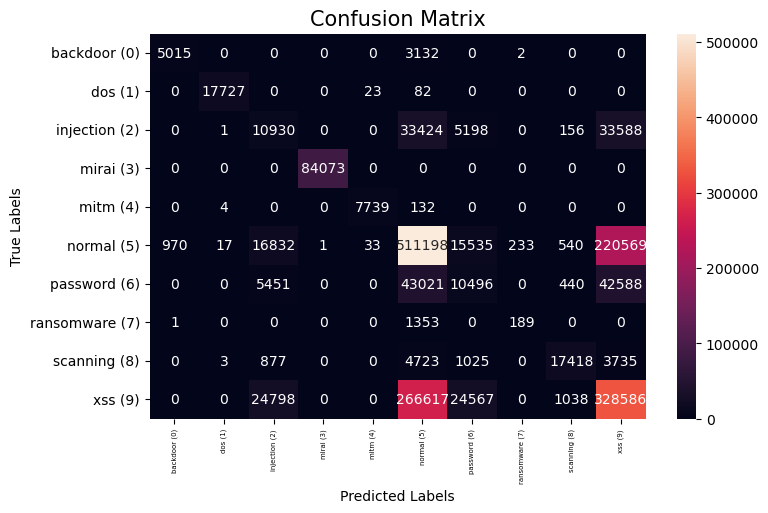

In [84]:
generateConfusionMatrix(y_pred, y_test)

In [85]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)']))

                precision    recall  f1-score   support

  backdoor (0)       0.84      0.62      0.71      8149
       dos (1)       1.00      0.99      1.00     17832
 injection (2)       0.19      0.13      0.15     83297
     mirai (3)       1.00      1.00      1.00     84073
      mitm (4)       0.99      0.98      0.99      7875
    normal (5)       0.59      0.67      0.63    765928
  password (6)       0.18      0.10      0.13    101996
ransomware (7)       0.45      0.12      0.19      1543
  scanning (8)       0.89      0.63      0.74     27781
       xss (9)       0.52      0.51      0.52    645606

      accuracy                           0.57   1744080
     macro avg       0.66      0.58      0.61   1744080
  weighted avg       0.55      0.57      0.56   1744080



In [86]:
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 56.96
Precision: 66.49
Recall: 57.52
F1-score: 60.50


: 

#### Applying GA Feature Selection

The Genetic Algorithm follows the evolution process and includes the following stages:  

1. Initilizing a random population
2. Evaluating the fitness of each member of the population using a fitness function
3. Then of the population generated the fitness score of each member of the population will be evaluated and the best will be selected as parents to generate a new popluation
4. The parents will then undergo mutation 
5. After each they'd undergo crossover
6. 

In [78]:
#Function to extract the suggested index from the array provided 
# Gets GA array as an array of os and 1s and identifies the ones with 1s and returns an array containing their index

def getIndx(arrayIndx):
    lenArr = len(arrayIndx)
    # Initialize an array with integer dtype
    arrayOutput = np.zeros(lenArr, dtype=int)  
    j = 0
    for i in range(lenArr):
        if arrayIndx[i] >= 0.5:
            arrayOutput[j] = i
            j += 1

    if j == 0:
        return [0]  # If no features are selected, return [0] as a placeholder

    arrayReturn = np.zeros(j, dtype=int)  # Initialize an array with integer dtype
    for i in range(j):
        arrayReturn[i] = arrayOutput[i] 
    
    return arrayReturn

In [82]:
# Define a function to evaluate the fitness of a feature subset
# The objective is to select a subset of features from the original dataset that results in the highest possible accuracy score of the DecisionTree Classifier.

def fitness_function(features):
   print('the new ga array is: ')
   print(features)
   arrayToTest = getIndx(features)
   print(arrayToTest)
   
   # Generate the subset of GA selected feature columns
   x_train_subset = x_train.iloc[:, arrayToTest]
   print("Extracted the x_train_subset")
   x_test_subset = x_test.iloc[:, arrayToTest]
   print("Extracted the x_test_subset")
   
   # Initialize the DecisionTreeClassifier model 
   dt_model = DecisionTreeClassifier(random_state=30, max_depth=10)
   dt_model.fit(x_train_subset, y_train)
   print("Model Training completed")
   
   # Obtain the models prediction on the test data
   y_pred = dt_model.predict(x_test_subset)

   accuracy = accuracy_score(y_test, y_pred)
   print("The accuracy score is - ", accuracy)
   print("------------------------------------")
   print("------------------------------------")
   print("")
   
   # Return the accuracy score since that's the objective function that we aim to optimize
   return -1 * accuracy

In [87]:
# Define the variable boundaries (which is between 0 and 1 meaning selected and not selected)
variable_boundaries = np.array([(0, 1)] * x_train.shape[1])

# Initialize the genetic algorithm
ga_model = ga(function=fitness_function, 
                dimension=x_train.shape[1], 
                variable_type='int', 
                variable_boundaries=variable_boundaries, 
                function_timeout=3600, 
                algorithm_parameters=
                {
                    'max_num_iteration': 100, 
                    'population_size': 50,
                    'mutation_probability': 0.1,
                    'elit_ratio': 0.01,
                    'crossover_probability': 0.5,
                    'parents_portion': 0.3,
                    'crossover_type':'uniform',
                    'max_iteration_without_improv': 10
                }
            )

the new ga array is: 
[1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1.]
[ 0  1  4  6  7  8  9 11 12 13 15 17 18 19 21 22 23 25 26 27 30 31 34 35
 37 40 43 47 48 49 51 52 56 57 59 61 64 68 73]
Extracted the x_train_subset
Extracted the x_test_subset
Model Training completed
The accuracy score is -  0.8786586624466768
------------------------------------
------------------------------------

the new ga array is: 
[1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0.]
[ 0  2  5  6  7  8  9 10 11 14 15 16 17 20 22 23 25 26 27 28 31 37 41 42
 43 45 48 50 51 52 53 54 55 57 58 59 62 63 65 66 67 68 69 71 72]
Extracted the x_train_subset
Extracted the 

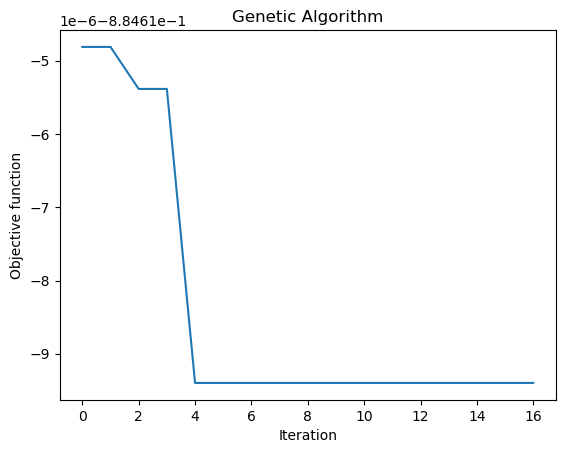

In [88]:
# Run the feature selection using genetic algorithm
ga_model.run()

In [89]:
# Get the best solution (selected features)
best_solution = ga_model.output_dict['variable']

In [90]:
# Print the selected features
selected_features_indices = np.where(best_solution == 1)[0]
selected_features_names = [f'Feature {i+1}' for i in selected_features_indices]
print("Selected features:")
print(selected_features_names)

Selected features:
['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 6', 'Feature 11', 'Feature 12', 'Feature 17', 'Feature 20', 'Feature 21', 'Feature 23', 'Feature 24', 'Feature 26', 'Feature 27', 'Feature 29', 'Feature 30', 'Feature 31', 'Feature 34', 'Feature 35', 'Feature 36', 'Feature 37', 'Feature 38', 'Feature 39', 'Feature 43', 'Feature 44', 'Feature 46', 'Feature 49', 'Feature 50', 'Feature 52', 'Feature 53', 'Feature 54', 'Feature 56', 'Feature 58', 'Feature 62', 'Feature 64', 'Feature 65', 'Feature 66', 'Feature 70', 'Feature 74']


In [95]:
selected_features_names

['Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 6',
 'Feature 11',
 'Feature 12',
 'Feature 17',
 'Feature 20',
 'Feature 21',
 'Feature 23',
 'Feature 24',
 'Feature 26',
 'Feature 27',
 'Feature 29',
 'Feature 30',
 'Feature 31',
 'Feature 34',
 'Feature 35',
 'Feature 36',
 'Feature 37',
 'Feature 38',
 'Feature 39',
 'Feature 43',
 'Feature 44',
 'Feature 46',
 'Feature 49',
 'Feature 50',
 'Feature 52',
 'Feature 53',
 'Feature 54',
 'Feature 56',
 'Feature 58',
 'Feature 62',
 'Feature 64',
 'Feature 65',
 'Feature 66',
 'Feature 70',
 'Feature 74']

In [130]:
# The index of the suggested features are:
#selected_features_indices

array([ 0,  1,  2,  3,  5, 10, 11, 16, 19, 20, 22, 23, 25, 26, 28, 29, 30,
       33, 34, 35, 36, 37, 38, 42, 43, 45, 48, 49, 51, 52, 53, 55, 57, 61,
       63, 64, 65, 69, 73])

In [77]:
#In case of kernel restart 
selected_features_indices = [0,  1,  2,  3,  5, 10, 11, 16, 19, 20, 22, 23, 25, 26, 28, 29, 30,
       33, 34, 35, 36, 37, 38, 42, 43, 45, 48, 49, 51, 52, 53, 55, 57, 61,
       63, 64, 65, 69, 73]

##### Extract New Dataset with suggested features: The Genetic Algorithm has suggested the above dataset features (columns) as the best for IOT network intrusion detection

In [78]:
# Generate the subset of GA selected feature columns
x_train_subset = x_train.iloc[:, selected_features_indices]
x_test_subset = x_test.iloc[:, selected_features_indices]

In [80]:
#Showing the GA proposed training dataset
x_train_subset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Timestamp,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Std,Flow_IAT_Max,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Pkt_Len_Mean,Pkt_Len_Std,FIN_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Pkts/b_Avg,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Min,Idle_Min
3886312,85571,35678,787,80,1556395939,322.0,1448.0,0.0,3384.031109,12.970606,137818.511497,315373.0,770974.0,154194.800000,316385.0,11.0,316661.0,315804.0,17.0,0,200,136,7.782364,237.181818,478.069204,1,2,9,0,0.0,260.900000,80.50,0,32,91,2,32,0.0,1.556360e+15
1957395,78002,80,916,33986,1556385847,0.0,0.0,0.0,0.000000,13793.103448,0.000000,145.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,32,32,6896.551724,0.000000,0.000000,1,0,2,0,1.0,0.000000,0.00,0,0,266,0,32,0.0,1.556350e+15
5236492,85571,46548,797,80,1556404169,1694.0,1448.0,0.0,5960.021901,14.860047,132249.900763,329615.0,874829.0,124975.571429,329813.0,33.0,345724.0,344541.0,17.0,0,264,168,9.144644,372.428571,607.527235,1,2,12,0,0.0,401.076923,338.80,5,130,133,3,32,0.0,1.556368e+15
2208238,85568,34348,902,80,1556385495,1671.0,1448.0,0.0,15970.479174,32.947350,97931.708892,311497.0,333866.0,55644.333333,311497.0,4.0,21903.0,20760.0,14.0,0,232,136,20.966496,444.333333,643.561162,1,2,10,0,0.0,484.727273,417.75,5,151,284,3,32,0.0,1.556349e+15
453406,85559,10985,1224,53,1556480539,505.0,51.0,505.0,47050.858932,169.247694,0.000000,11817.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,8,8,84.623847,202.333333,262.117022,0,0,0,0,1.0,303.500000,505.00,0,252,0,0,8,0.0,1.556445e+15


In [81]:
#Showing the GA proposed training dataset
x_test_subset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Timestamp,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Std,Flow_IAT_Max,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Pkt_Len_Mean,Pkt_Len_Std,FIN_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Pkts/b_Avg,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Min,Idle_Min
4039493,85568,48521,893,53,1556397765,180.0,37.0,37.0,10.401732,0.253701,1.191554e+07,31526645.0,31530591.0,10510197.0,31530160.0,147.0,31530885.0,31529112.0,435.0,0,32,32,0.126850,40.555556,7.055337,0,0,0,0,1.0,45.625,45.0,4,22,0,3,8,3662.0,3.152664e+07
2815992,85568,47964,907,80,1556390458,0.0,0.0,0.0,0.000000,3780.718336,0.000000e+00,529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20,20,1890.359168,0.000000,0.000000,1,0,2,0,1.0,0.000,0.0,0,0,8212,0,20,0.0,1.556354e+15
3249021,75888,80,916,50338,1556393692,0.0,0.0,0.0,0.000000,9615.384615,0.000000e+00,208.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32,32,4807.692308,0.000000,0.000000,1,0,2,0,1.0,0.000,0.0,0,0,237,0,32,0.0,1.556358e+15
2424123,85568,40460,893,53,1556389066,90.0,37.0,37.0,54036.243822,1317.957166,1.023169e+03,2149.0,166.0,166.0,166.0,166.0,720.0,720.0,720.0,0,16,16,658.978583,40.200000,7.155418,0,0,0,0,1.0,50.250,45.0,4,22,0,1,8,0.0,1.556353e+15
3588435,85568,60440,907,80,1556396008,0.0,0.0,0.0,0.000000,260.213375,0.000000e+00,7686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20,20,130.106687,0.000000,0.000000,1,0,2,0,1.0,0.000,0.0,0,0,8212,0,20,0.0,1.556360e+15


In [81]:
# The list of the GA suggested columns
x_train_subset.columns

Index(['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Timestamp',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Flow_Byts/s',
       'Flow_Pkts/s', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Pkt_Len_Mean', 'Pkt_Len_Std',
       'FIN_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'ECE_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Bwd_Seg_Size_Avg', 'Bwd_Pkts/b_Avg',
       'Subflow_Bwd_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts',
       'Fwd_Seg_Size_Min', 'Active_Min', 'Idle_Min'],
      dtype='object')

### The BiLSTM model

In [85]:
# Creating the structure of the BiLSTM model

# Define the BiLSTM model
BiLSTM_model = Sequential()
BiLSTM_model.add(Bidirectional(LSTM(128), input_shape=(x_train_subset.shape[1], 1))) 
BiLSTM_model.add(Dropout(0.2))
BiLSTM_model.add(Dense(10, activation='softmax'))
# Compiling the model
BiLSTM_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

/opt/anaconda3/envs/feyi/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
#Model summary
BiLSTM_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,690 (530.04 KB)

 Trainable params: 135,690 (530.04 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# Early stopping and learning rate reduction to improve performance and avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

In [88]:
# Model training 
BiLSTM_model_history = BiLSTM_model.fit(x_train_subset, y_train, epochs=30, validation_split=0.3, shuffle=True, batch_size=128, callbacks=[early_stopping, reduce_lr])

Epoch 1/30
22256/22256 ━━━━━━━━━━━━━━━━━━━━ 2226s 100ms/step - accuracy: 0.8384 - loss: 0.4636 - val_accuracy: 0.8652 - val_loss: 0.3644 - learning_rate: 0.0010
Epoch 2/30
22256/22256 ━━━━━━━━━━━━━━━━━━━━ 2454s 110ms/step - accuracy: 0.8644 - loss: 0.3707 - val_accuracy: 0.8663 - val_loss: 0.3654 - learning_rate: 0.0010
Epoch 3/30
22256/22256 ━━━━━━━━━━━━━━━━━━━━ 2121s 95ms/step - accuracy: 0.8656 - loss: 0.3667 - val_accuracy: 0.8667 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 4/30
22256/22256 ━━━━━━━━━━━━━━━━━━━━ 1709s 77ms/step - accuracy: 0.8655 - loss: 0.3658 - val_accuracy: 0.8670 - val_loss: 0.3633 - learning_rate: 0.0010
Epoch 5/30
22256/22256 ━━━━━━━━━━━━━━━━━━━━ 6341s 285ms/step - accuracy: 0.8653 - loss: 0.3702 - val_accuracy: 0.8671 - val_loss: 0.3587 - learning_rate: 0.0010
Epoch 6/30
22256/22256 ━━━━━━━━━━━━━━━━━━━━ 2269s 102ms/step - accuracy: 0.8657 - loss: 0.3657 - val_accuracy: 0.8667 - val_loss: 0.3644 - learning_rate: 0.0010
Epoch 7/30
22256/22256 ━━━━━━━━━━━━━

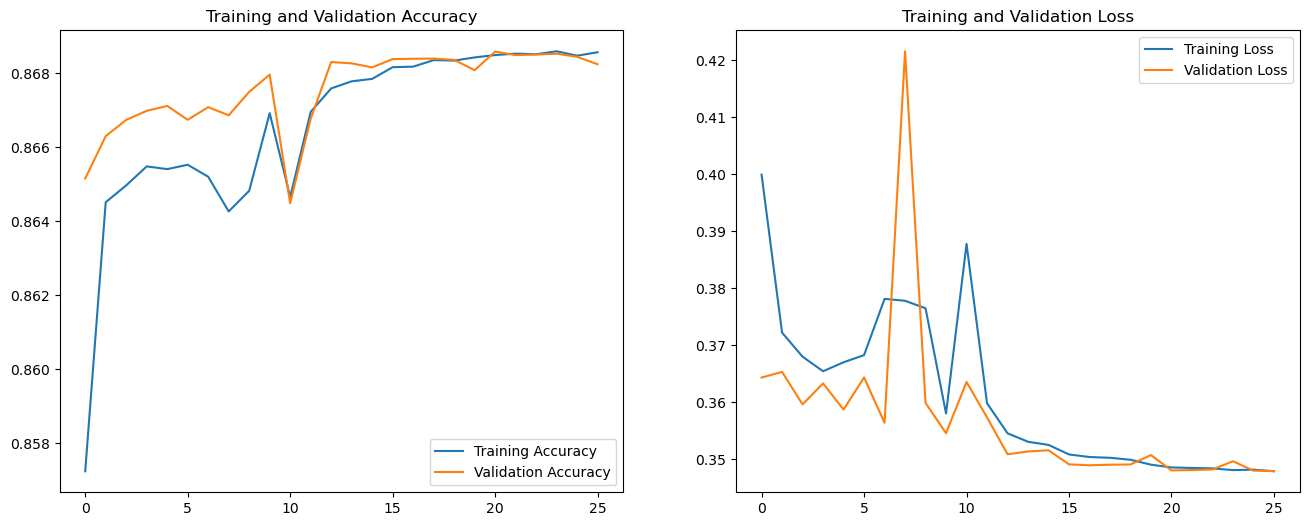

In [89]:
#Plotting the BiLSTM model results

#Getting the accuracy
acc = BiLSTM_model_history.history['accuracy']
val_acc = BiLSTM_model_history.history['val_accuracy']

#Getting the losses
loss = BiLSTM_model_history.history['loss']
val_loss = BiLSTM_model_history.history['val_loss']

#No of epochs it trained
epochs_range = BiLSTM_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [90]:
# Evaluating the model's accuracy on the test data
evaluation_result = BiLSTM_model.evaluate(x_test_subset, y_test)

54503/54503 ━━━━━━━━━━━━━━━━━━━━ 462s 8ms/step - accuracy: 0.8685 - loss: 0.3469


In [ ]:
# Print models inference on the test data only 
print("Loss of the model is - " , evaluation_result[0])
print("Accuracy of the model is - " , evaluation_result[1]*100 , "%")

Loss of the model is -  0.3470363914966583
Accuracy of the model is -  86.85495853424072 %


In [92]:
#Get model's prediction on the test data
BiLSTM_model_predictions = BiLSTM_model.predict(x_test_subset)

54503/54503 ━━━━━━━━━━━━━━━━━━━━ 469s 9ms/step


In [93]:
# The models prediction returned as an array of probablity for each class
BiLSTM_model_predictions

array([[3.11635108e-06, 1.82440851e-06, 2.44668461e-02, ...,
        3.23561312e-06, 2.28081308e-02, 9.30083752e-01],
       [1.32395530e-06, 7.49011349e-07, 1.72159955e-01, ...,
        1.07411836e-06, 1.32227354e-02, 5.48804879e-01],
       [1.17707391e-08, 1.33631008e-08, 8.00065181e-10, ...,
        1.96827941e-07, 3.60617802e-09, 2.17349747e-08],
       ...,
       [1.67075674e-12, 1.15774654e-10, 9.05197521e-13, ...,
        2.24603960e-10, 1.76059612e-12, 4.44441539e-10],
       [1.42630760e-11, 1.09502929e-09, 6.28277994e-05, ...,
        1.07303055e-09, 1.85268289e-06, 9.72091496e-01],
       [5.11829791e-19, 3.44407525e-09, 3.17466964e-25, ...,
        6.09088870e-21, 2.43913334e-09, 1.76771132e-25]], dtype=float32)

In [94]:
#convert the models prediction value here so it will just be inform of 0,1,2,3,...
y_pred = np.argmax(BiLSTM_model_predictions, axis=-1) 

In [95]:
#Converted models prediction
y_pred

array([9, 9, 5, ..., 5, 9, 3])

[[  8053      0      0      0      0     33      0     61      0      2]
 [     0  17708      0     17     15     37      0      0      1     54]
 [     0      0     24      0      0      9    188      0      0  83076]
 [     0      2      0  77596    546     88      0      0   5841      0]
 [     2     13      0   3954   2225     93      0      3   1514     71]
 [     1      4      1    723     21 753034      0    209   1032  10903]
 [     0      0      4      0      0      0    767      0      0 101225]
 [     2      0      0      0      0     74      0   1467      0      0]
 [     0      1      0   7575    148     33    127      0   9391  10506]
 [     2      3     32      0      3     90    920      1      0 644555]]


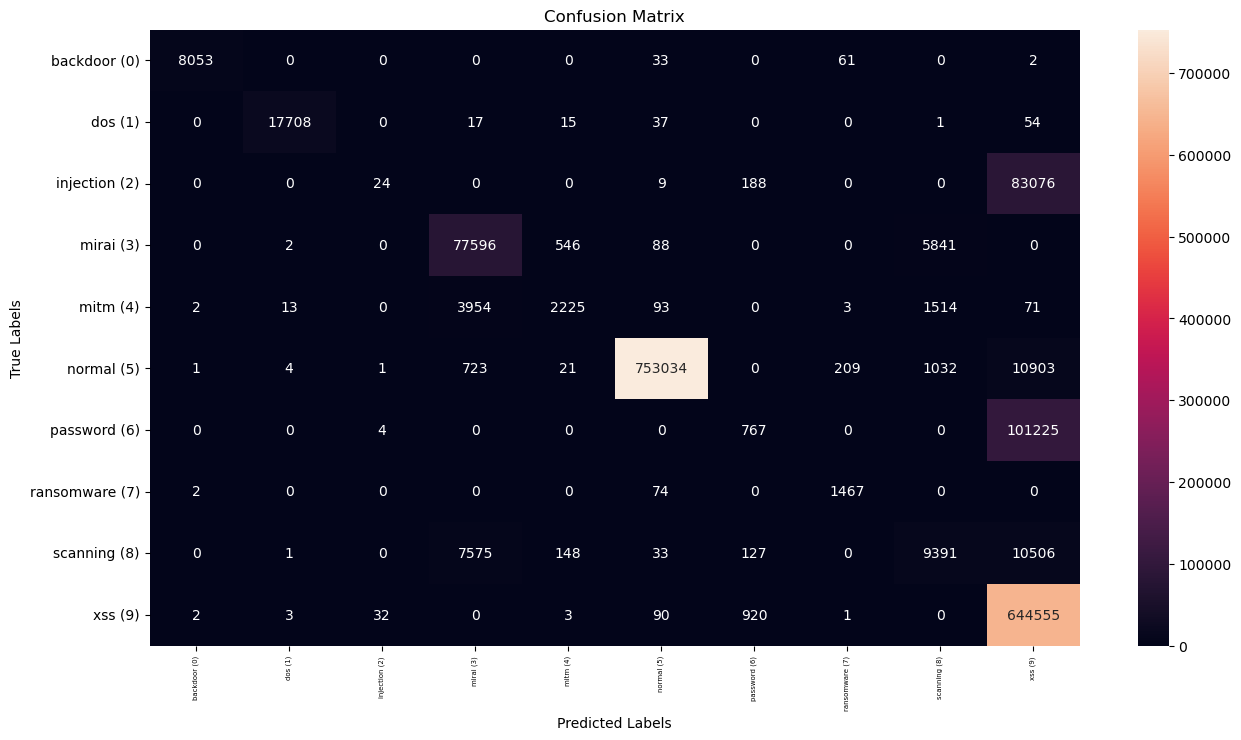

In [98]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)'],fontsize=5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)'],fontsize=10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

# plt.savefig(' Confusion Matrix.png')
plt.show()

In [102]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)']))

                precision    recall  f1-score   support

  backdoor (0)       1.00      0.99      0.99      8149
       dos (1)       1.00      0.99      1.00     17832
 injection (2)       0.39      0.00      0.00     83297
     mirai (3)       0.86      0.92      0.89     84073
      mitm (4)       0.75      0.28      0.41      7875
    normal (5)       1.00      0.98      0.99    765928
  password (6)       0.38      0.01      0.01    101996
ransomware (7)       0.84      0.95      0.89      1543
  scanning (8)       0.53      0.34      0.41     27781
       xss (9)       0.76      1.00      0.86    645606

      accuracy                           0.87   1744080
     macro avg       0.75      0.65      0.65   1744080
  weighted avg       0.83      0.87      0.82   1744080



In [101]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy: %.2f" %(accuracy*100))
print("Precision: %.2f" %(precision*100))
print("Recall: %.2f" %(recall*100))
print("F1-score: %.2f" %(f1*100))

Accuracy: 86.85
Precision: 75.18
Recall: 64.65
F1-score: 64.66


In [112]:
#Save the model
BiLSTM_model.save("saved_model/Latest_BiLSTM_model.keras")

## The BiLSTM with individual dataset being resampled

In [79]:
# Show the labels and their corresponding encoding for Attack column
cleaned_first_dataset["Attack"].value_counts()

Attack
normal        2515236
xss           2149308
password       340208
injection      277696
scanning        36205
backdoor        27145
ransomware       5098
mitm              517
dos               347
Name: count, dtype: int64

In [80]:
# Show the labels and their corresponding encoding for Attack column
new_cleaned_second_dataset["Attack"].value_counts()

Attack
mirai       281243
dos          59390
scanning     56744
normal       38598
mitm         25862
Name: count, dtype: int64

##### Extract each dataset from the cleaned and preprocessed combined dataset

In [81]:
# Getting first dataset from first row to row 5351759 and the second from row 5351760 to the end
extracted_first_dataset = encoded_merged_dataset.iloc[0:5351760, :]
extracted_second_dataset = encoded_merged_dataset.iloc[5351760: -1, :]

In [82]:
extracted_first_dataset.shape

(5351760, 75)

In [83]:
extracted_second_dataset.shape

(461836, 75)

In [84]:
# Current distribution of the first dataset
extracted_first_dataset["Attack"].value_counts()

Attack
5    2515236
9    2149308
6     340208
2     277696
8      36205
0      27145
7       5098
4        517
1        347
Name: count, dtype: int64

In [85]:
# Current distribution of the second dataset
extracted_second_dataset["Attack"].value_counts()

Attack
3    281243
1     59390
8     56744
5     38597
4     25862
Name: count, dtype: int64

In [86]:
# Separating the x and y for the first and second dataset for applying data balancing
X_first = extracted_first_dataset.drop(columns=["Attack"])
Y_first = extracted_first_dataset["Attack"]

X_second = extracted_second_dataset.drop(columns=["Attack"])
Y_second = extracted_second_dataset["Attack"]

In [87]:
X_first.head(5)

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,76462,0,893,0,0,1556212732,47814343,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104571,1.195359e+07,1.433437e+07,30203068.0,14.0,47814343.0,1.195359e+07,1.433437e+07,30203068.0,14.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.104571,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1038036.0,0.000000e+00,1038036.0,1038036.0,5.187256e+14,8.984590e+14,1.556177e+15,1.657324e+07
1,70238,0,1900,0,0,1556212729,2033142,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983699,2.033142e+06,0.000000e+00,2033142.0,2033142.0,2033142.0,2.033142e+06,0.000000e+00,2033142.0,2033142.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.983699,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15
2,140236,0,790,0,0,1556212717,82877133,14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168925,6.375164e+06,4.413120e+06,12563772.0,226402.0,82877133.0,6.375164e+06,4.413120e+06,12563772.0,226402.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.168925,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1931160.5,1.711593e+06,3942470.0,226402.0,1.729085e+14,5.187256e+14,1.556177e+15,6.036493e+06
3,80449,0,12,0,0,1556212722,24359,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.105177,2.435900e+04,0.000000e+00,24359.0,24359.0,24359.0,2.435900e+04,0.000000e+00,24359.0,24359.0,0.0,0.0,0.0,0.0,0.0,0,0,0,82.105177,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,1.556177e+15,0.000000e+00,1.556177e+15,1.556177e+15
4,80387,0,12,0,0,1556212722,10239351,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292987,5.119676e+06,1.507128e+06,6185376.0,4053975.0,10239351.0,5.119676e+06,1.507128e+06,6185376.0,4053975.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.292987,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,4053975.0,0.000000e+00,4053975.0,4053975.0,7.780884e+14,1.100383e+15,1.556177e+15,6.185376e+06


In [88]:
X_second.head(5)

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,85540,10000,886,10101,17,1564025153,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,1,982,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0
1,112355,2179,882,554,6,1558908666,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,1,0,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0
2,85543,52727,882,9020,6,1562808288,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0
3,85543,52964,882,9020,6,1567569497,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0
4,85538,36763,1754,1900,17,1568079678,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,2,886,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0


##### Resample the second dataset to match the number of normal attacks by applying SMOTE sample then apply random sampling to reduce the number of instances for other classes to 38500

In [89]:
# Applying data balancing on the first dataset
print("Before resampling - ",Counter(Y_second))

# Instantiate SMOTE and apply resampling
smote = SMOTE(sampling_strategy={4: 38500}, random_state=24)
X_second_resampled, Y_second_resampled = smote.fit_resample(X_second, Y_second)

# define undersampling strategy
random_under_sampler = RandomUnderSampler(sampling_strategy={3: 38500, 1: 38500, 8: 38500, 5: 38500}, random_state=24)
# fit and apply the transform
X_second_balanced, Y_second_balanced = random_under_sampler.fit_resample(X_second_resampled, Y_second_resampled)
# summarize class distribution
print(Counter(Y_second_balanced))

Before resampling -  Counter({3: 281243, 1: 59390, 8: 56744, 5: 38597, 4: 25862})
Counter({1: 38500, 3: 38500, 4: 38500, 5: 38500, 8: 38500})


In [90]:
# Current distribution of the second dataset
Y_second_balanced.value_counts()

Attack
1    38500
3    38500
4    38500
5    38500
8    38500
Name: count, dtype: int64

In [91]:
# Combining the two datasets together for further balancing 

#Combine the X for both 
X_combined = pd.concat([X_first, X_second_balanced])
Y_combined = pd.concat([Y_first, Y_second_balanced])

In [92]:
# Current distribution of the combined dataset
Y_combined.value_counts()

Attack
5    2553736
9    2149308
6     340208
2     277696
8      74705
4      39017
1      38847
3      38500
0      27145
7       5098
Name: count, dtype: int64

#### Applying model SMOTE and random sampling on the combined dataset

In [93]:
# Applying data balancing on the second dataset

# First add the second balanced dataset
print("Before resampling - ",Counter(Y_combined))

# Instantiate SMOTE and apply resampling
smote = SMOTE(sampling_strategy={0: 38500, 7: 38500}, random_state=24)
X_combined_resampled, Y_combined_resampled = smote.fit_resample(X_combined, Y_combined)

# define undersampling strategy
random_under_sampler = RandomUnderSampler(sampling_strategy={5: 38500, 9: 38500, 6: 38500, 2: 38500, 8: 38500, 4: 38500, 1: 38500}, random_state=24)
# fit and apply the transform
X_combined_balanced, Y_combined_balanced = random_under_sampler.fit_resample(X_combined_resampled, Y_combined_resampled)
# summarize class distribution
print(Counter(Y_combined_balanced))

Before resampling -  Counter({5: 2553736, 9: 2149308, 6: 340208, 2: 277696, 8: 74705, 4: 39017, 1: 38847, 3: 38500, 0: 27145, 7: 5098})
Counter({0: 38500, 1: 38500, 2: 38500, 3: 38500, 4: 38500, 5: 38500, 6: 38500, 7: 38500, 8: 38500, 9: 38500})


Attack
0    38500
1    38500
2    38500
3    38500
4    38500
5    38500
6    38500
7    38500
8    38500
9    38500
Name: count, dtype: int64


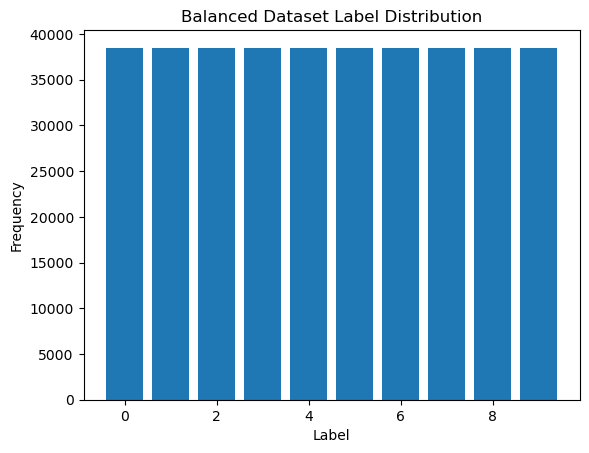

In [94]:
#The class distribution in the merged dataset
# Count the frequency of each label
label_counts = Y_combined_balanced.value_counts()
print(label_counts)

# Plot the bar chart
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Balanced Dataset Label Distribution')

# Show the plot
plt.show()

In [139]:
#Get the training and test set from the depression dataset
x_combined_balanced_train, x_combined_balanced_test, y_combined_balanced_train, y_combined_balanced_test = train_test_split(X_combined_balanced, Y_combined_balanced, test_size=0.2, random_state= 24)

In [140]:
x_combined_balanced_train.shape

(308000, 74)

In [141]:
y_combined_balanced_train.value_counts()

Attack
6    30876
2    30841
1    30835
9    30833
0    30804
4    30796
8    30786
5    30762
7    30757
3    30710
Name: count, dtype: int64

In [142]:
x_combined_balanced_test.shape 

(77000, 74)

In [143]:
y_combined_balanced_test.value_counts()

Attack
3    7790
7    7743
5    7738
8    7714
4    7704
0    7696
9    7667
1    7665
2    7659
6    7624
Name: count, dtype: int64

In [144]:
# Generate the subset of GA selected feature columns
x_combined_balanced_train_subset = x_combined_balanced_train.iloc[:, selected_features_indices]
x_combined_balanced_test_subset = x_combined_balanced_test.iloc[:, selected_features_indices]

### The BiLSTM training on the balanced dataset

In [ ]:
# Creating the structure of the BiLSTM model

# Define the BiLSTM model
BiLSTM_model = Sequential()
BiLSTM_model.add(Bidirectional(LSTM(128), input_shape=(x_combined_balanced_train_subset.shape[1], 1))) 
BiLSTM_model.add(Dropout(0.2))
BiLSTM_model.add(Dense(10, activation='softmax'))
# Compiling the model
BiLSTM_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

/opt/anaconda3/envs/feyi/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model summary
BiLSTM_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,690 (530.04 KB)

 Trainable params: 135,690 (530.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping and learning rate reduction to improve performance and avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

In [ ]:
# Model training 
BiLSTM_model_history = BiLSTM_model.fit(x_combined_balanced_train_subset, y_train, epochs=30, validation_split=0.2, shuffle=True, batch_size=64, callbacks=[early_stopping, reduce_lr])

Epoch 1/30
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 817s 276ms/step - accuracy: 0.6642 - loss: 0.8079 - val_accuracy: 0.7288 - val_loss: 0.5988 - learning_rate: 0.0010
Epoch 2/30
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 858s 291ms/step - accuracy: 0.7258 - loss: 0.6120 - val_accuracy: 0.7339 - val_loss: 0.5887 - learning_rate: 0.0010
Epoch 3/30
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 833s 283ms/step - accuracy: 0.7275 - loss: 0.6039 - val_accuracy: 0.7366 - val_loss: 0.5838 - learning_rate: 0.0010
Epoch 4/30
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 565s 192ms/step - accuracy: 0.7302 - loss: 0.5978 - val_accuracy: 0.7421 - val_loss: 0.5738 - learning_rate: 0.0010
Epoch 5/30
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 531s 180ms/step - accuracy: 0.7330 - loss: 0.5912 - val_accuracy: 0.7388 - val_loss: 0.5765 - learning_rate: 0.0010
Epoch 6/30
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 516s 175ms/step - accuracy: 0.7336 - loss: 0.5887 - val_accuracy: 0.7374 - val_loss: 0.5827 - learning_rate: 0.0010
Epoch 7/30
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 502s 170ms

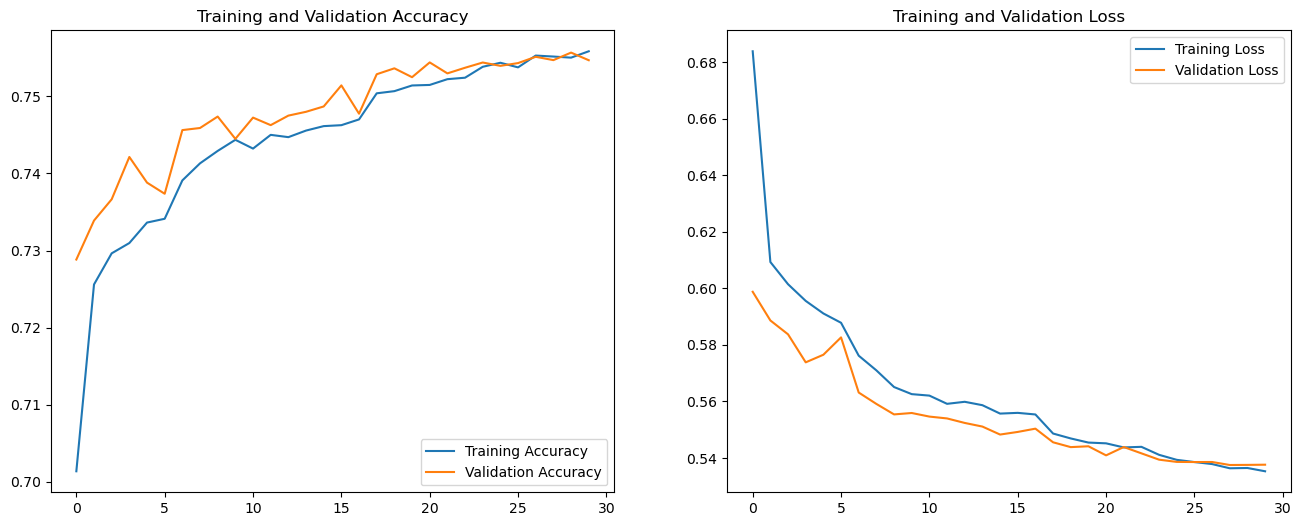

In [ ]:
#Plotting the BiLSTM model results

#Getting the accuracy
acc = BiLSTM_model_history.history['accuracy']
val_acc = BiLSTM_model_history.history['val_accuracy']

#Getting the losses
loss = BiLSTM_model_history.history['loss']
val_loss = BiLSTM_model_history.history['val_loss']

#No of epochs it trained
epochs_range = BiLSTM_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Evaluating the model's accuracy on the test data
evaluation_result = BiLSTM_model.evaluate(reshaped_x_combined_balanced_test_subset, y_combined_balanced_test)

3610/3610 ━━━━━━━━━━━━━━━━━━━━ 188s 52ms/step - accuracy: 0.7546 - loss: 0.5365


In [ ]:
print("Loss of the model is - " , evaluation_result[0])
print("Accuracy of the model is - " , evaluation_result[1]*100 , "%")

Loss of the model is -  0.5361161231994629
Accuracy of the model is -  75.52034854888916 %


In [ ]:
#Get model's prediction on the test data
BiLSTM_model_predictions = BiLSTM_model.predict(reshaped_x_combined_balanced_test_subset)

3610/3610 ━━━━━━━━━━━━━━━━━━━━ 180s 50ms/step


In [ ]:
# Models prediction being returned as an array of probabily of belonging to each class 
BiLSTM_model_predictions

array([[3.34302662e-03, 3.58817225e-08, 1.43798218e-08, ...,
        9.96597290e-01, 2.20309417e-07, 1.01001973e-07],
       [1.15947190e-08, 3.59251580e-08, 1.11725407e-09, ...,
        3.56991343e-08, 8.57687041e-08, 2.83778490e-09],
       [2.68082545e-07, 2.23470508e-07, 3.06867989e-08, ...,
        2.53750102e-07, 3.54269177e-01, 7.99649698e-08],
       ...,
       [3.93000192e-08, 2.22255885e-08, 1.23098609e-09, ...,
        1.09779812e-08, 2.47404911e-04, 2.19924678e-09],
       [2.96942783e-11, 2.83435897e-09, 3.21210886e-14, ...,
        3.70279467e-11, 2.14056115e-08, 9.02679624e-14],
       [2.46008881e-07, 4.24585551e-07, 2.88975626e-01, ...,
        2.80240475e-09, 1.00330606e-01, 8.54241103e-02]], dtype=float32)

In [ ]:
#convert the models prediction value here so it will just be inform of 0,1,2,3,...
y_pred = np.argmax(BiLSTM_model_predictions, axis=-1) 

In [ ]:
# The converted model prediction
y_pred

array([7, 5, 4, ..., 4, 3, 6])

[[11456     3     0     0     2    10     1    75     0     2]
 [    0 11525     0     5    31     3     0     1     0     2]
 [    0     0  2741     0     1     0  7084     2    38  1631]
 [    0     0     0  9249  1202     7     0     0  1194     0]
 [    2    51     2    75  8961     5     0     6  2445     5]
 [    1     5    11     6     9 11356     4    20    24   138]
 [    0     0  1479     0     2     1  9478     0   314   213]
 [   11     0     0     0     2    32     0 11605     0     0]
 [    1     8   882    72  1766     1  2361     0  4560  1801]
 [    0     7  1804     0     1     0  3337     0    76  6295]]


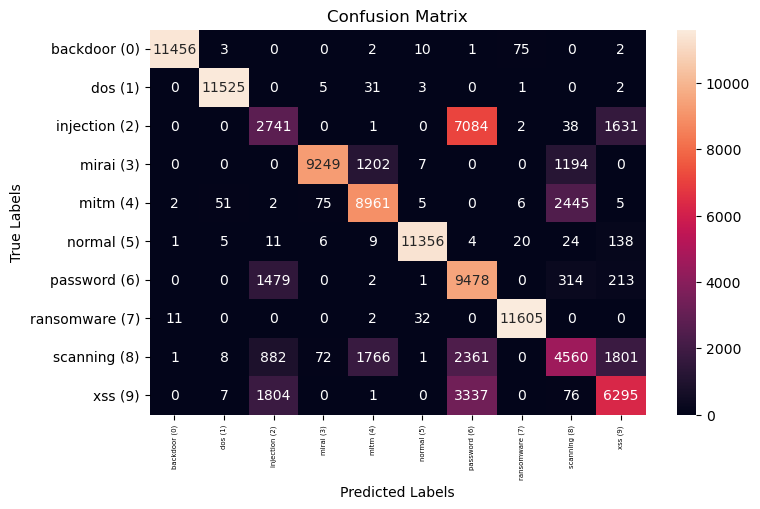

In [ ]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(y_combined_balanced_test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)'],fontsize=5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)'],fontsize=10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

# plt.savefig(' Confusion Matrix.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(y_combined_balanced_test, y_pred, target_names = ['backdoor (0)', 'dos (1)', 'injection (2)', 'mirai (3)', 'mitm (4)', 'normal (5)', 'password (6)', 'ransomware (7)', 'scanning (8)', 'xss (9)']))

                precision    recall  f1-score   support

  backdoor (0)       1.00      0.99      1.00     11549
       dos (1)       0.99      1.00      0.99     11567
 injection (2)       0.40      0.24      0.30     11497
     mirai (3)       0.98      0.79      0.88     11652
      mitm (4)       0.75      0.78      0.76     11552
    normal (5)       0.99      0.98      0.99     11574
  password (6)       0.43      0.83      0.56     11487
ransomware (7)       0.99      1.00      0.99     11650
  scanning (8)       0.53      0.40      0.45     11452
       xss (9)       0.62      0.55      0.58     11520

      accuracy                           0.76    115500
     macro avg       0.77      0.75      0.75    115500
  weighted avg       0.77      0.76      0.75    115500



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_combined_balanced_test, y_pred)
precision = precision_score(y_combined_balanced_test, y_pred, average="macro")
recall = recall_score(y_combined_balanced_test, y_pred, average='macro')
f1 = f1_score(y_combined_balanced_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy: %.2f" %(accuracy*100))
print("Precision: %.2f" %(precision*100))
print("Recall: %.2f" %(recall*100))
print("F1-score: %.2f" %(f1*100))

Accuracy: 75.52
Precision: 76.83
Recall: 75.43
F1-score: 75.08


In [ ]:
#Save the model
BiLSTM_model.save("saved_model/Balanced_combined_BiLSTM_model.keras")